In [1]:
'''
Training a fully supervised one layer NMF on 20 news group dataset
'''

'\nTraining a fully supervised one layer NMF on 20 news group dataset\n'

In [2]:
# import package
import torch
from torch.autograd import Variable
import Ipynb_importer
from deep_nmf import Deep_NMF, Energy_Loss_Func
from writer import Writer
from matplotlib import pyplot as plt
import numpy as np

importing Jupyter notebook from deep_nmf.ipynb
importing Jupyter notebook from lsqnonneg_module.ipynb
importing Jupyter notebook from writer.ipynb


In [3]:
# load the dataset for twenty news
from twenty_news_group_data_loading import data, Y, L20, L50, L90, sparsedata_cr_entr, sparsedata_L2#, get_whole_output

importing Jupyter notebook from twenty_news_group_data_loading.ipynb


In [4]:
# Define the network 
m = data.shape[1]
k = 20
c = 20
lambd = 100
net = Deep_NMF([m, k], c)
loss_func = Energy_Loss_Func(lambd = lambd, classification_type = 'L2')
dataset = sparsedata_L2(data*1000, Y)

In [5]:
# Training process!

# setting training parameters
batchsize = 50
epoch = 5
lr_nmf = 10000
lr_cl = 0.1
loss_lst = []
# train!
for epo in range(epoch):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = batchsize, shuffle = True)
    total_loss = 0
    for (i, (inputs, label)) in enumerate(dataloader):
        # train the lsqnonneg layers
        inputs = inputs.view([inputs.shape[0], inputs.shape[2]])
        label = label.view([label.shape[0], -1])
        inputs, label = Variable(inputs), Variable(label)
        S_lst,pred = net(inputs)
        loss = loss_func(net, inputs, S_lst,pred,label)
        loss.backward()
        loss_lst.append(loss.data)
        total_loss += loss.data
        print('training the nmf layer')
        print(loss.data)
        for A in net.lsqnonneglst.parameters():
            A.data = A.data.sub_(lr_nmf*A.grad.data)
            A.data = A.data.clamp(min = 0)
            A.requires_grad = False
        # train the linear classifier
        print('training the classifier')
        for k in range(10):
            net.zero_grad()
            S_lst,pred = net(inputs)
            loss = loss_func(net, inputs, S_lst,pred,label)
            loss.backward()
            print(loss.data)
            for A in net.linear.parameters():
                A.data = A.data.sub_(lr_cl*A.grad.data)
        for A in net.lsqnonneglst.parameters():
            A.requires_grad = True
    print('epoch = ', epo, '\n', total_loss)

training the nmf layer
tensor(12.6865, dtype=torch.float64)
training the classifier
tensor(12.4863, dtype=torch.float64)
tensor(12.4736, dtype=torch.float64)
tensor(12.4613, dtype=torch.float64)
tensor(12.4495, dtype=torch.float64)
tensor(12.4381, dtype=torch.float64)
tensor(12.4271, dtype=torch.float64)
tensor(12.4164, dtype=torch.float64)
tensor(12.4062, dtype=torch.float64)
tensor(12.3962, dtype=torch.float64)
tensor(12.3866, dtype=torch.float64)
training the nmf layer
tensor(12.5246, dtype=torch.float64)
training the classifier
tensor(12.2751, dtype=torch.float64)
tensor(12.1410, dtype=torch.float64)
tensor(12.0714, dtype=torch.float64)
tensor(12.0353, dtype=torch.float64)
tensor(12.0166, dtype=torch.float64)
tensor(12.0069, dtype=torch.float64)
tensor(12.0018, dtype=torch.float64)
tensor(11.9992, dtype=torch.float64)
tensor(11.9979, dtype=torch.float64)
tensor(11.9972, dtype=torch.float64)
training the nmf layer
tensor(12.3935, dtype=torch.float64)
training the classifier
tensor(1

tensor(9.4922, dtype=torch.float64)
tensor(9.4568, dtype=torch.float64)
tensor(9.4414, dtype=torch.float64)
tensor(9.4347, dtype=torch.float64)
tensor(9.4317, dtype=torch.float64)
tensor(9.4303, dtype=torch.float64)
tensor(9.4297, dtype=torch.float64)
tensor(9.4293, dtype=torch.float64)
tensor(9.4291, dtype=torch.float64)
training the nmf layer
tensor(9.4693, dtype=torch.float64)
training the classifier
tensor(9.4065, dtype=torch.float64)
tensor(9.3540, dtype=torch.float64)
tensor(9.3280, dtype=torch.float64)
tensor(9.3151, dtype=torch.float64)
tensor(9.3086, dtype=torch.float64)
tensor(9.3053, dtype=torch.float64)
tensor(9.3035, dtype=torch.float64)
tensor(9.3026, dtype=torch.float64)
tensor(9.3020, dtype=torch.float64)
tensor(9.3017, dtype=torch.float64)
training the nmf layer
tensor(9.7397, dtype=torch.float64)
training the classifier
tensor(9.6775, dtype=torch.float64)
tensor(9.5985, dtype=torch.float64)
tensor(9.5737, dtype=torch.float64)
tensor(9.5658, dtype=torch.float64)
tensor

tensor(9.7012, dtype=torch.float64)
tensor(9.7001, dtype=torch.float64)
training the nmf layer
tensor(9.6774, dtype=torch.float64)
training the classifier
tensor(9.5724, dtype=torch.float64)
tensor(9.4606, dtype=torch.float64)
tensor(9.4562, dtype=torch.float64)
tensor(9.4549, dtype=torch.float64)
tensor(9.4536, dtype=torch.float64)
tensor(9.4524, dtype=torch.float64)
tensor(9.4512, dtype=torch.float64)
tensor(9.4501, dtype=torch.float64)
tensor(9.4489, dtype=torch.float64)
tensor(9.4477, dtype=torch.float64)
training the nmf layer
tensor(9.4382, dtype=torch.float64)
training the classifier
tensor(9.3237, dtype=torch.float64)
tensor(9.1856, dtype=torch.float64)
tensor(9.1757, dtype=torch.float64)
tensor(9.1724, dtype=torch.float64)
tensor(9.1695, dtype=torch.float64)
tensor(9.1667, dtype=torch.float64)
tensor(9.1639, dtype=torch.float64)
tensor(9.1612, dtype=torch.float64)
tensor(9.1586, dtype=torch.float64)
tensor(9.1560, dtype=torch.float64)
training the nmf layer
tensor(9.7375, dtyp

tensor(9.0123, dtype=torch.float64)
tensor(9.0094, dtype=torch.float64)
tensor(9.0065, dtype=torch.float64)
tensor(9.0037, dtype=torch.float64)
tensor(9.0008, dtype=torch.float64)
tensor(8.9980, dtype=torch.float64)
tensor(8.9953, dtype=torch.float64)
tensor(8.9925, dtype=torch.float64)
training the nmf layer
tensor(9.3115, dtype=torch.float64)
training the classifier
tensor(9.0436, dtype=torch.float64)
tensor(8.8094, dtype=torch.float64)
tensor(8.8064, dtype=torch.float64)
tensor(8.8039, dtype=torch.float64)
tensor(8.8013, dtype=torch.float64)
tensor(8.7988, dtype=torch.float64)
tensor(8.7962, dtype=torch.float64)
tensor(8.7937, dtype=torch.float64)
tensor(8.7912, dtype=torch.float64)
tensor(8.7887, dtype=torch.float64)
training the nmf layer
tensor(9.7162, dtype=torch.float64)
training the classifier
tensor(9.4960, dtype=torch.float64)
tensor(9.3763, dtype=torch.float64)
tensor(9.3722, dtype=torch.float64)
tensor(9.3696, dtype=torch.float64)
tensor(9.3671, dtype=torch.float64)
tensor

tensor(9.0625, dtype=torch.float64)
training the nmf layer
tensor(9.3883, dtype=torch.float64)
training the classifier
tensor(8.9457, dtype=torch.float64)
tensor(8.8706, dtype=torch.float64)
tensor(8.8623, dtype=torch.float64)
tensor(8.8596, dtype=torch.float64)
tensor(8.8574, dtype=torch.float64)
tensor(8.8553, dtype=torch.float64)
tensor(8.8531, dtype=torch.float64)
tensor(8.8510, dtype=torch.float64)
tensor(8.8489, dtype=torch.float64)
tensor(8.8468, dtype=torch.float64)
training the nmf layer
tensor(9.2001, dtype=torch.float64)
training the classifier
tensor(8.5235, dtype=torch.float64)
tensor(8.3935, dtype=torch.float64)
tensor(8.3782, dtype=torch.float64)
tensor(8.3704, dtype=torch.float64)
tensor(8.3632, dtype=torch.float64)
tensor(8.3561, dtype=torch.float64)
tensor(8.3491, dtype=torch.float64)
tensor(8.3421, dtype=torch.float64)
tensor(8.3353, dtype=torch.float64)
tensor(8.3286, dtype=torch.float64)
training the nmf layer
tensor(9.1208, dtype=torch.float64)
training the classi

tensor(7.9934, dtype=torch.float64)
tensor(7.9899, dtype=torch.float64)
tensor(7.9866, dtype=torch.float64)
tensor(7.9835, dtype=torch.float64)
tensor(7.9804, dtype=torch.float64)
tensor(7.9773, dtype=torch.float64)
tensor(7.9743, dtype=torch.float64)
training the nmf layer
tensor(8.9447, dtype=torch.float64)
training the classifier
tensor(8.6540, dtype=torch.float64)
tensor(8.5211, dtype=torch.float64)
tensor(8.5009, dtype=torch.float64)
tensor(8.4941, dtype=torch.float64)
tensor(8.4889, dtype=torch.float64)
tensor(8.4840, dtype=torch.float64)
tensor(8.4792, dtype=torch.float64)
tensor(8.4745, dtype=torch.float64)
tensor(8.4698, dtype=torch.float64)
tensor(8.4652, dtype=torch.float64)
training the nmf layer
tensor(9.1344, dtype=torch.float64)
training the classifier
tensor(8.6020, dtype=torch.float64)
tensor(8.3068, dtype=torch.float64)
tensor(8.2636, dtype=torch.float64)
tensor(8.2532, dtype=torch.float64)
tensor(8.2472, dtype=torch.float64)
tensor(8.2417, dtype=torch.float64)
tensor

training the nmf layer
tensor(8.6893, dtype=torch.float64)
training the classifier
tensor(8.1019, dtype=torch.float64)
tensor(7.9499, dtype=torch.float64)
tensor(7.9227, dtype=torch.float64)
tensor(7.9150, dtype=torch.float64)
tensor(7.9103, dtype=torch.float64)
tensor(7.9061, dtype=torch.float64)
tensor(7.9020, dtype=torch.float64)
tensor(7.8981, dtype=torch.float64)
tensor(7.8942, dtype=torch.float64)
tensor(7.8904, dtype=torch.float64)
training the nmf layer
tensor(9.2297, dtype=torch.float64)
training the classifier
tensor(8.7703, dtype=torch.float64)
tensor(8.5892, dtype=torch.float64)
tensor(8.5579, dtype=torch.float64)
tensor(8.5501, dtype=torch.float64)
tensor(8.5460, dtype=torch.float64)
tensor(8.5425, dtype=torch.float64)
tensor(8.5392, dtype=torch.float64)
tensor(8.5359, dtype=torch.float64)
tensor(8.5327, dtype=torch.float64)
tensor(8.5295, dtype=torch.float64)
training the nmf layer
tensor(9.1608, dtype=torch.float64)
training the classifier
tensor(8.8398, dtype=torch.floa

tensor(7.8838, dtype=torch.float64)
tensor(7.8804, dtype=torch.float64)
tensor(7.8772, dtype=torch.float64)
tensor(7.8740, dtype=torch.float64)
tensor(7.8708, dtype=torch.float64)
tensor(7.8677, dtype=torch.float64)
training the nmf layer
tensor(8.6210, dtype=torch.float64)
training the classifier
tensor(8.0518, dtype=torch.float64)
tensor(7.9537, dtype=torch.float64)
tensor(7.9256, dtype=torch.float64)
tensor(7.9157, dtype=torch.float64)
tensor(7.9107, dtype=torch.float64)
tensor(7.9069, dtype=torch.float64)
tensor(7.9034, dtype=torch.float64)
tensor(7.9001, dtype=torch.float64)
tensor(7.8969, dtype=torch.float64)
tensor(7.8937, dtype=torch.float64)
training the nmf layer
tensor(8.5149, dtype=torch.float64)
training the classifier
tensor(8.1405, dtype=torch.float64)
tensor(8.0490, dtype=torch.float64)
tensor(8.0231, dtype=torch.float64)
tensor(8.0137, dtype=torch.float64)
tensor(8.0085, dtype=torch.float64)
tensor(8.0044, dtype=torch.float64)
tensor(8.0007, dtype=torch.float64)
tensor

tensor(8.1562, dtype=torch.float64)
tensor(8.1010, dtype=torch.float64)
tensor(8.0830, dtype=torch.float64)
tensor(8.0761, dtype=torch.float64)
tensor(8.0726, dtype=torch.float64)
tensor(8.0702, dtype=torch.float64)
tensor(8.0681, dtype=torch.float64)
tensor(8.0662, dtype=torch.float64)
tensor(8.0643, dtype=torch.float64)
tensor(8.0624, dtype=torch.float64)
training the nmf layer
tensor(8.9500, dtype=torch.float64)
training the classifier
tensor(8.5440, dtype=torch.float64)
tensor(8.4815, dtype=torch.float64)
tensor(8.4605, dtype=torch.float64)
tensor(8.4522, dtype=torch.float64)
tensor(8.4478, dtype=torch.float64)
tensor(8.4447, dtype=torch.float64)
tensor(8.4419, dtype=torch.float64)
tensor(8.4394, dtype=torch.float64)
tensor(8.4368, dtype=torch.float64)
tensor(8.4343, dtype=torch.float64)
training the nmf layer
tensor(9.1046, dtype=torch.float64)
training the classifier
tensor(8.6562, dtype=torch.float64)
tensor(8.5397, dtype=torch.float64)
tensor(8.5023, dtype=torch.float64)
tensor

tensor(8.0074, dtype=torch.float64)
tensor(8.0055, dtype=torch.float64)
tensor(8.0037, dtype=torch.float64)
training the nmf layer
tensor(8.5398, dtype=torch.float64)
training the classifier
tensor(8.0872, dtype=torch.float64)
tensor(7.9820, dtype=torch.float64)
tensor(7.9453, dtype=torch.float64)
tensor(7.9310, dtype=torch.float64)
tensor(7.9241, dtype=torch.float64)
tensor(7.9197, dtype=torch.float64)
tensor(7.9161, dtype=torch.float64)
tensor(7.9127, dtype=torch.float64)
tensor(7.9095, dtype=torch.float64)
tensor(7.9063, dtype=torch.float64)
training the nmf layer
tensor(8.7548, dtype=torch.float64)
training the classifier
tensor(8.3402, dtype=torch.float64)
tensor(8.2540, dtype=torch.float64)
tensor(8.2243, dtype=torch.float64)
tensor(8.2125, dtype=torch.float64)
tensor(8.2065, dtype=torch.float64)
tensor(8.2022, dtype=torch.float64)
tensor(8.1986, dtype=torch.float64)
tensor(8.1952, dtype=torch.float64)
tensor(8.1919, dtype=torch.float64)
tensor(8.1886, dtype=torch.float64)
traini

tensor(7.9979, dtype=torch.float64)
tensor(7.9399, dtype=torch.float64)
tensor(7.9173, dtype=torch.float64)
tensor(7.9072, dtype=torch.float64)
tensor(7.9014, dtype=torch.float64)
tensor(7.8972, dtype=torch.float64)
tensor(7.8935, dtype=torch.float64)
tensor(7.8901, dtype=torch.float64)
tensor(7.8867, dtype=torch.float64)
training the nmf layer
tensor(8.6650, dtype=torch.float64)
training the classifier
tensor(8.3620, dtype=torch.float64)
tensor(8.2696, dtype=torch.float64)
tensor(8.2342, dtype=torch.float64)
tensor(8.2193, dtype=torch.float64)
tensor(8.2118, dtype=torch.float64)
tensor(8.2069, dtype=torch.float64)
tensor(8.2031, dtype=torch.float64)
tensor(8.1996, dtype=torch.float64)
tensor(8.1963, dtype=torch.float64)
tensor(8.1930, dtype=torch.float64)
training the nmf layer
tensor(8.5330, dtype=torch.float64)
training the classifier
tensor(8.1974, dtype=torch.float64)
tensor(8.1225, dtype=torch.float64)
tensor(8.0924, dtype=torch.float64)
tensor(8.0791, dtype=torch.float64)
tensor

tensor(8.1793, dtype=torch.float64)
tensor(8.1780, dtype=torch.float64)
training the nmf layer
tensor(8.4914, dtype=torch.float64)
training the classifier
tensor(8.0053, dtype=torch.float64)
tensor(7.9420, dtype=torch.float64)
tensor(7.9138, dtype=torch.float64)
tensor(7.9004, dtype=torch.float64)
tensor(7.8935, dtype=torch.float64)
tensor(7.8892, dtype=torch.float64)
tensor(7.8861, dtype=torch.float64)
tensor(7.8836, dtype=torch.float64)
tensor(7.8812, dtype=torch.float64)
tensor(7.8790, dtype=torch.float64)
training the nmf layer
tensor(8.8526, dtype=torch.float64)
training the classifier
tensor(8.2878, dtype=torch.float64)
tensor(8.2262, dtype=torch.float64)
tensor(8.1973, dtype=torch.float64)
tensor(8.1832, dtype=torch.float64)
tensor(8.1758, dtype=torch.float64)
tensor(8.1714, dtype=torch.float64)
tensor(8.1685, dtype=torch.float64)
tensor(8.1662, dtype=torch.float64)
tensor(8.1641, dtype=torch.float64)
tensor(8.1622, dtype=torch.float64)
training the nmf layer
tensor(8.4876, dtyp

tensor(7.9338, dtype=torch.float64)
tensor(7.9282, dtype=torch.float64)
tensor(7.9251, dtype=torch.float64)
tensor(7.9231, dtype=torch.float64)
tensor(7.9216, dtype=torch.float64)
tensor(7.9203, dtype=torch.float64)
tensor(7.9191, dtype=torch.float64)
tensor(7.9180, dtype=torch.float64)
training the nmf layer
tensor(8.8290, dtype=torch.float64)
training the classifier
tensor(8.1738, dtype=torch.float64)
tensor(8.0821, dtype=torch.float64)
tensor(8.0403, dtype=torch.float64)
tensor(8.0207, dtype=torch.float64)
tensor(8.0107, dtype=torch.float64)
tensor(8.0051, dtype=torch.float64)
tensor(8.0014, dtype=torch.float64)
tensor(7.9986, dtype=torch.float64)
tensor(7.9961, dtype=torch.float64)
tensor(7.9939, dtype=torch.float64)
training the nmf layer
tensor(8.6312, dtype=torch.float64)
training the classifier
tensor(8.2819, dtype=torch.float64)
tensor(8.2079, dtype=torch.float64)
tensor(8.1722, dtype=torch.float64)
tensor(8.1544, dtype=torch.float64)
tensor(8.1450, dtype=torch.float64)
tensor

tensor(8.6115, dtype=torch.float64)
training the nmf layer
tensor(9.0046, dtype=torch.float64)
training the classifier
tensor(8.5105, dtype=torch.float64)
tensor(8.4519, dtype=torch.float64)
tensor(8.4220, dtype=torch.float64)
tensor(8.4060, dtype=torch.float64)
tensor(8.3968, dtype=torch.float64)
tensor(8.3908, dtype=torch.float64)
tensor(8.3863, dtype=torch.float64)
tensor(8.3827, dtype=torch.float64)
tensor(8.3794, dtype=torch.float64)
tensor(8.3764, dtype=torch.float64)
training the nmf layer
tensor(8.1939, dtype=torch.float64)
training the classifier
tensor(7.3714, dtype=torch.float64)
tensor(7.3110, dtype=torch.float64)
tensor(7.2821, dtype=torch.float64)
tensor(7.2678, dtype=torch.float64)
tensor(7.2603, dtype=torch.float64)
tensor(7.2561, dtype=torch.float64)
tensor(7.2535, dtype=torch.float64)
tensor(7.2515, dtype=torch.float64)
tensor(7.2498, dtype=torch.float64)
tensor(7.2484, dtype=torch.float64)
training the nmf layer
tensor(8.1510, dtype=torch.float64)
training the classi

tensor(7.5131, dtype=torch.float64)
tensor(7.5040, dtype=torch.float64)
tensor(7.4987, dtype=torch.float64)
tensor(7.4952, dtype=torch.float64)
tensor(7.4925, dtype=torch.float64)
tensor(7.4903, dtype=torch.float64)
tensor(7.4883, dtype=torch.float64)
training the nmf layer
tensor(8.4955, dtype=torch.float64)
training the classifier
tensor(8.0662, dtype=torch.float64)
tensor(8.0270, dtype=torch.float64)
tensor(8.0063, dtype=torch.float64)
tensor(7.9950, dtype=torch.float64)
tensor(7.9884, dtype=torch.float64)
tensor(7.9841, dtype=torch.float64)
tensor(7.9811, dtype=torch.float64)
tensor(7.9786, dtype=torch.float64)
tensor(7.9765, dtype=torch.float64)
tensor(7.9745, dtype=torch.float64)
training the nmf layer
tensor(8.1177, dtype=torch.float64)
training the classifier
tensor(7.5282, dtype=torch.float64)
tensor(7.4985, dtype=torch.float64)
tensor(7.4829, dtype=torch.float64)
tensor(7.4744, dtype=torch.float64)
tensor(7.4695, dtype=torch.float64)
tensor(7.4665, dtype=torch.float64)
tensor

training the nmf layer
tensor(8.3298, dtype=torch.float64)
training the classifier
tensor(7.5480, dtype=torch.float64)
tensor(7.5136, dtype=torch.float64)
tensor(7.4963, dtype=torch.float64)
tensor(7.4871, dtype=torch.float64)
tensor(7.4818, dtype=torch.float64)
tensor(7.4783, dtype=torch.float64)
tensor(7.4758, dtype=torch.float64)
tensor(7.4736, dtype=torch.float64)
tensor(7.4717, dtype=torch.float64)
tensor(7.4699, dtype=torch.float64)
training the nmf layer
tensor(8.5460, dtype=torch.float64)
training the classifier
tensor(8.0283, dtype=torch.float64)
tensor(7.9900, dtype=torch.float64)
tensor(7.9684, dtype=torch.float64)
tensor(7.9559, dtype=torch.float64)
tensor(7.9484, dtype=torch.float64)
tensor(7.9435, dtype=torch.float64)
tensor(7.9401, dtype=torch.float64)
tensor(7.9375, dtype=torch.float64)
tensor(7.9353, dtype=torch.float64)
tensor(7.9334, dtype=torch.float64)
training the nmf layer
tensor(8.2738, dtype=torch.float64)
training the classifier
tensor(7.6156, dtype=torch.floa

tensor(7.8017, dtype=torch.float64)
tensor(7.7964, dtype=torch.float64)
tensor(7.7928, dtype=torch.float64)
tensor(7.7901, dtype=torch.float64)
tensor(7.7879, dtype=torch.float64)
tensor(7.7859, dtype=torch.float64)
training the nmf layer
tensor(8.6315, dtype=torch.float64)
training the classifier
tensor(7.7642, dtype=torch.float64)
tensor(7.7316, dtype=torch.float64)
tensor(7.7126, dtype=torch.float64)
tensor(7.7013, dtype=torch.float64)
tensor(7.6943, dtype=torch.float64)
tensor(7.6898, dtype=torch.float64)
tensor(7.6866, dtype=torch.float64)
tensor(7.6843, dtype=torch.float64)
tensor(7.6824, dtype=torch.float64)
tensor(7.6807, dtype=torch.float64)
training the nmf layer
tensor(8.7196, dtype=torch.float64)
training the classifier
tensor(8.2889, dtype=torch.float64)
tensor(8.2098, dtype=torch.float64)
tensor(8.1645, dtype=torch.float64)
tensor(8.1380, dtype=torch.float64)
tensor(8.1222, dtype=torch.float64)
tensor(8.1124, dtype=torch.float64)
tensor(8.1059, dtype=torch.float64)
tensor

tensor(7.9288, dtype=torch.float64)
tensor(7.8861, dtype=torch.float64)
tensor(7.8623, dtype=torch.float64)
tensor(7.8488, dtype=torch.float64)
tensor(7.8410, dtype=torch.float64)
tensor(7.8363, dtype=torch.float64)
tensor(7.8333, dtype=torch.float64)
tensor(7.8313, dtype=torch.float64)
tensor(7.8297, dtype=torch.float64)
tensor(7.8285, dtype=torch.float64)
training the nmf layer
tensor(8.5018, dtype=torch.float64)
training the classifier
tensor(7.8665, dtype=torch.float64)
tensor(7.8388, dtype=torch.float64)
tensor(7.8224, dtype=torch.float64)
tensor(7.8125, dtype=torch.float64)
tensor(7.8062, dtype=torch.float64)
tensor(7.8020, dtype=torch.float64)
tensor(7.7989, dtype=torch.float64)
tensor(7.7964, dtype=torch.float64)
tensor(7.7943, dtype=torch.float64)
tensor(7.7925, dtype=torch.float64)
training the nmf layer
tensor(8.2110, dtype=torch.float64)
training the classifier
tensor(7.5594, dtype=torch.float64)
tensor(7.5355, dtype=torch.float64)
tensor(7.5210, dtype=torch.float64)
tensor

tensor(7.2696, dtype=torch.float64)
tensor(7.2674, dtype=torch.float64)
tensor(7.2656, dtype=torch.float64)
training the nmf layer
tensor(8.5005, dtype=torch.float64)
training the classifier
tensor(8.0840, dtype=torch.float64)
tensor(8.0153, dtype=torch.float64)
tensor(7.9749, dtype=torch.float64)
tensor(7.9509, dtype=torch.float64)
tensor(7.9363, dtype=torch.float64)
tensor(7.9271, dtype=torch.float64)
tensor(7.9209, dtype=torch.float64)
tensor(7.9165, dtype=torch.float64)
tensor(7.9132, dtype=torch.float64)
tensor(7.9104, dtype=torch.float64)
training the nmf layer
tensor(8.4926, dtype=torch.float64)
training the classifier
tensor(7.9304, dtype=torch.float64)
tensor(7.8707, dtype=torch.float64)
tensor(7.8317, dtype=torch.float64)
tensor(7.8060, dtype=torch.float64)
tensor(7.7889, dtype=torch.float64)
tensor(7.7774, dtype=torch.float64)
tensor(7.7696, dtype=torch.float64)
tensor(7.7640, dtype=torch.float64)
tensor(7.7600, dtype=torch.float64)
tensor(7.7569, dtype=torch.float64)
traini

tensor(6.8880, dtype=torch.float64)
tensor(6.8727, dtype=torch.float64)
tensor(6.8634, dtype=torch.float64)
tensor(6.8576, dtype=torch.float64)
tensor(6.8537, dtype=torch.float64)
tensor(6.8510, dtype=torch.float64)
tensor(6.8489, dtype=torch.float64)
tensor(6.8472, dtype=torch.float64)
tensor(6.8458, dtype=torch.float64)
training the nmf layer
tensor(7.9082, dtype=torch.float64)
training the classifier
tensor(7.3026, dtype=torch.float64)
tensor(7.2387, dtype=torch.float64)
tensor(7.2036, dtype=torch.float64)
tensor(7.1841, dtype=torch.float64)
tensor(7.1731, dtype=torch.float64)
tensor(7.1667, dtype=torch.float64)
tensor(7.1629, dtype=torch.float64)
tensor(7.1603, dtype=torch.float64)
tensor(7.1585, dtype=torch.float64)
tensor(7.1571, dtype=torch.float64)
training the nmf layer
tensor(8.9325, dtype=torch.float64)
training the classifier
tensor(8.2577, dtype=torch.float64)
tensor(8.1797, dtype=torch.float64)
tensor(8.1312, dtype=torch.float64)
tensor(8.1008, dtype=torch.float64)
tensor

tensor(6.8212, dtype=torch.float64)
tensor(6.8200, dtype=torch.float64)
training the nmf layer
tensor(8.0520, dtype=torch.float64)
training the classifier
tensor(7.5238, dtype=torch.float64)
tensor(7.4975, dtype=torch.float64)
tensor(7.4806, dtype=torch.float64)
tensor(7.4694, dtype=torch.float64)
tensor(7.4616, dtype=torch.float64)
tensor(7.4559, dtype=torch.float64)
tensor(7.4514, dtype=torch.float64)
tensor(7.4477, dtype=torch.float64)
tensor(7.4444, dtype=torch.float64)
tensor(7.4415, dtype=torch.float64)
training the nmf layer
tensor(8.4806, dtype=torch.float64)
training the classifier
tensor(7.9726, dtype=torch.float64)
tensor(7.9290, dtype=torch.float64)
tensor(7.9022, dtype=torch.float64)
tensor(7.8855, dtype=torch.float64)
tensor(7.8749, dtype=torch.float64)
tensor(7.8680, dtype=torch.float64)
tensor(7.8633, dtype=torch.float64)
tensor(7.8600, dtype=torch.float64)
tensor(7.8575, dtype=torch.float64)
tensor(7.8555, dtype=torch.float64)
training the nmf layer
tensor(8.1950, dtyp

tensor(6.2637, dtype=torch.float64)
tensor(6.2394, dtype=torch.float64)
tensor(6.2259, dtype=torch.float64)
tensor(6.2180, dtype=torch.float64)
tensor(6.2133, dtype=torch.float64)
tensor(6.2102, dtype=torch.float64)
tensor(6.2080, dtype=torch.float64)
tensor(6.2063, dtype=torch.float64)
tensor(6.2049, dtype=torch.float64)
training the nmf layer
tensor(7.7694, dtype=torch.float64)
training the classifier
tensor(7.0553, dtype=torch.float64)
tensor(7.0432, dtype=torch.float64)
tensor(7.0353, dtype=torch.float64)
tensor(7.0300, dtype=torch.float64)
tensor(7.0263, dtype=torch.float64)
tensor(7.0236, dtype=torch.float64)
tensor(7.0215, dtype=torch.float64)
tensor(7.0198, dtype=torch.float64)
tensor(7.0184, dtype=torch.float64)
tensor(7.0170, dtype=torch.float64)
training the nmf layer
tensor(7.7977, dtype=torch.float64)
training the classifier
tensor(7.3527, dtype=torch.float64)
tensor(7.3289, dtype=torch.float64)
tensor(7.3138, dtype=torch.float64)
tensor(7.3041, dtype=torch.float64)
tensor

tensor(7.4594, dtype=torch.float64)
tensor(7.4580, dtype=torch.float64)
training the nmf layer
tensor(7.4332, dtype=torch.float64)
training the classifier
tensor(6.8068, dtype=torch.float64)
tensor(6.7806, dtype=torch.float64)
tensor(6.7630, dtype=torch.float64)
tensor(6.7509, dtype=torch.float64)
tensor(6.7424, dtype=torch.float64)
tensor(6.7361, dtype=torch.float64)
tensor(6.7313, dtype=torch.float64)
tensor(6.7274, dtype=torch.float64)
tensor(6.7241, dtype=torch.float64)
tensor(6.7212, dtype=torch.float64)
training the nmf layer
tensor(8.1030, dtype=torch.float64)
training the classifier
tensor(7.3192, dtype=torch.float64)
tensor(7.2846, dtype=torch.float64)
tensor(7.2629, dtype=torch.float64)
tensor(7.2490, dtype=torch.float64)
tensor(7.2401, dtype=torch.float64)
tensor(7.2340, dtype=torch.float64)
tensor(7.2298, dtype=torch.float64)
tensor(7.2267, dtype=torch.float64)
tensor(7.2243, dtype=torch.float64)
tensor(7.2223, dtype=torch.float64)
training the nmf layer
tensor(7.4999, dtyp

tensor(6.5580, dtype=torch.float64)
tensor(6.5472, dtype=torch.float64)
tensor(6.5399, dtype=torch.float64)
tensor(6.5348, dtype=torch.float64)
tensor(6.5310, dtype=torch.float64)
tensor(6.5280, dtype=torch.float64)
tensor(6.5256, dtype=torch.float64)
tensor(6.5235, dtype=torch.float64)
training the nmf layer
tensor(8.3072, dtype=torch.float64)
training the classifier
tensor(7.8843, dtype=torch.float64)
tensor(7.8459, dtype=torch.float64)
tensor(7.8201, dtype=torch.float64)
tensor(7.8029, dtype=torch.float64)
tensor(7.7911, dtype=torch.float64)
tensor(7.7831, dtype=torch.float64)
tensor(7.7775, dtype=torch.float64)
tensor(7.7736, dtype=torch.float64)
tensor(7.7706, dtype=torch.float64)
tensor(7.7684, dtype=torch.float64)
training the nmf layer
tensor(7.8129, dtype=torch.float64)
training the classifier
tensor(7.2572, dtype=torch.float64)
tensor(7.2282, dtype=torch.float64)
tensor(7.2101, dtype=torch.float64)
tensor(7.1986, dtype=torch.float64)
tensor(7.1911, dtype=torch.float64)
tensor

tensor(7.7024, dtype=torch.float64)
training the nmf layer
tensor(8.2579, dtype=torch.float64)
training the classifier
tensor(7.7218, dtype=torch.float64)
tensor(7.6877, dtype=torch.float64)
tensor(7.6644, dtype=torch.float64)
tensor(7.6483, dtype=torch.float64)
tensor(7.6372, dtype=torch.float64)
tensor(7.6295, dtype=torch.float64)
tensor(7.6241, dtype=torch.float64)
tensor(7.6202, dtype=torch.float64)
tensor(7.6174, dtype=torch.float64)
tensor(7.6152, dtype=torch.float64)
training the nmf layer
tensor(8.0612, dtype=torch.float64)
training the classifier
tensor(7.2919, dtype=torch.float64)
tensor(7.2475, dtype=torch.float64)
tensor(7.2194, dtype=torch.float64)
tensor(7.2013, dtype=torch.float64)
tensor(7.1897, dtype=torch.float64)
tensor(7.1820, dtype=torch.float64)
tensor(7.1769, dtype=torch.float64)
tensor(7.1733, dtype=torch.float64)
tensor(7.1707, dtype=torch.float64)
tensor(7.1687, dtype=torch.float64)
training the nmf layer
tensor(7.6940, dtype=torch.float64)
training the classi

tensor(7.6822, dtype=torch.float64)
tensor(7.6738, dtype=torch.float64)
tensor(7.6677, dtype=torch.float64)
tensor(7.6634, dtype=torch.float64)
tensor(7.6601, dtype=torch.float64)
tensor(7.6577, dtype=torch.float64)
tensor(7.6558, dtype=torch.float64)
training the nmf layer
tensor(8.2106, dtype=torch.float64)
training the classifier
tensor(7.8806, dtype=torch.float64)
tensor(7.8504, dtype=torch.float64)
tensor(7.8301, dtype=torch.float64)
tensor(7.8165, dtype=torch.float64)
tensor(7.8072, dtype=torch.float64)
tensor(7.8008, dtype=torch.float64)
tensor(7.7964, dtype=torch.float64)
tensor(7.7932, dtype=torch.float64)
tensor(7.7909, dtype=torch.float64)
tensor(7.7891, dtype=torch.float64)
training the nmf layer
tensor(7.6789, dtype=torch.float64)
training the classifier
tensor(6.9953, dtype=torch.float64)
tensor(6.9712, dtype=torch.float64)
tensor(6.9555, dtype=torch.float64)
tensor(6.9452, dtype=torch.float64)
tensor(6.9383, dtype=torch.float64)
tensor(6.9336, dtype=torch.float64)
tensor

training the nmf layer
tensor(7.7002, dtype=torch.float64)
training the classifier
tensor(6.9200, dtype=torch.float64)
tensor(6.8808, dtype=torch.float64)
tensor(6.8540, dtype=torch.float64)
tensor(6.8355, dtype=torch.float64)
tensor(6.8227, dtype=torch.float64)
tensor(6.8136, dtype=torch.float64)
tensor(6.8072, dtype=torch.float64)
tensor(6.8025, dtype=torch.float64)
tensor(6.7989, dtype=torch.float64)
tensor(6.7962, dtype=torch.float64)
training the nmf layer
tensor(7.4373, dtype=torch.float64)
training the classifier
tensor(6.6503, dtype=torch.float64)
tensor(6.6434, dtype=torch.float64)
tensor(6.6388, dtype=torch.float64)
tensor(6.6355, dtype=torch.float64)
tensor(6.6332, dtype=torch.float64)
tensor(6.6314, dtype=torch.float64)
tensor(6.6299, dtype=torch.float64)
tensor(6.6287, dtype=torch.float64)
tensor(6.6276, dtype=torch.float64)
tensor(6.6266, dtype=torch.float64)
training the nmf layer
tensor(8.0447, dtype=torch.float64)
training the classifier
tensor(7.3032, dtype=torch.floa

tensor(7.1123, dtype=torch.float64)
tensor(7.1073, dtype=torch.float64)
tensor(7.1035, dtype=torch.float64)
tensor(7.1006, dtype=torch.float64)
tensor(7.0983, dtype=torch.float64)
tensor(7.0963, dtype=torch.float64)
training the nmf layer
tensor(7.8423, dtype=torch.float64)
training the classifier
tensor(7.0589, dtype=torch.float64)
tensor(7.0360, dtype=torch.float64)
tensor(7.0204, dtype=torch.float64)
tensor(7.0097, dtype=torch.float64)
tensor(7.0024, dtype=torch.float64)
tensor(6.9972, dtype=torch.float64)
tensor(6.9934, dtype=torch.float64)
tensor(6.9907, dtype=torch.float64)
tensor(6.9885, dtype=torch.float64)
tensor(6.9869, dtype=torch.float64)
training the nmf layer
tensor(7.7032, dtype=torch.float64)
training the classifier
tensor(6.9385, dtype=torch.float64)
tensor(6.9122, dtype=torch.float64)
tensor(6.8954, dtype=torch.float64)
tensor(6.8846, dtype=torch.float64)
tensor(6.8775, dtype=torch.float64)
tensor(6.8728, dtype=torch.float64)
tensor(6.8695, dtype=torch.float64)
tensor

tensor(7.4635, dtype=torch.float64)
tensor(7.4390, dtype=torch.float64)
tensor(7.4219, dtype=torch.float64)
tensor(7.4098, dtype=torch.float64)
tensor(7.4010, dtype=torch.float64)
tensor(7.3944, dtype=torch.float64)
tensor(7.3894, dtype=torch.float64)
tensor(7.3853, dtype=torch.float64)
tensor(7.3820, dtype=torch.float64)
tensor(7.3791, dtype=torch.float64)
training the nmf layer
tensor(8.3406, dtype=torch.float64)
training the classifier
tensor(7.7237, dtype=torch.float64)
tensor(7.6619, dtype=torch.float64)
tensor(7.6199, dtype=torch.float64)
tensor(7.5912, dtype=torch.float64)
tensor(7.5714, dtype=torch.float64)
tensor(7.5576, dtype=torch.float64)
tensor(7.5478, dtype=torch.float64)
tensor(7.5407, dtype=torch.float64)
tensor(7.5353, dtype=torch.float64)
tensor(7.5312, dtype=torch.float64)
training the nmf layer
tensor(7.5143, dtype=torch.float64)
training the classifier
tensor(7.2147, dtype=torch.float64)
tensor(7.1279, dtype=torch.float64)
tensor(7.0693, dtype=torch.float64)
tensor

tensor(7.8489, dtype=torch.float64)
tensor(7.8453, dtype=torch.float64)
tensor(7.8422, dtype=torch.float64)
training the nmf layer
tensor(7.3466, dtype=torch.float64)
training the classifier
tensor(6.5187, dtype=torch.float64)
tensor(6.4559, dtype=torch.float64)
tensor(6.4167, dtype=torch.float64)
tensor(6.3922, dtype=torch.float64)
tensor(6.3767, dtype=torch.float64)
tensor(6.3669, dtype=torch.float64)
tensor(6.3607, dtype=torch.float64)
tensor(6.3566, dtype=torch.float64)
tensor(6.3539, dtype=torch.float64)
tensor(6.3520, dtype=torch.float64)
training the nmf layer
tensor(7.8466, dtype=torch.float64)
training the classifier
tensor(7.2984, dtype=torch.float64)
tensor(7.2669, dtype=torch.float64)
tensor(7.2444, dtype=torch.float64)
tensor(7.2282, dtype=torch.float64)
tensor(7.2163, dtype=torch.float64)
tensor(7.2075, dtype=torch.float64)
tensor(7.2009, dtype=torch.float64)
tensor(7.1959, dtype=torch.float64)
tensor(7.1919, dtype=torch.float64)
tensor(7.1886, dtype=torch.float64)
traini

tensor(6.7631, dtype=torch.float64)
tensor(6.7367, dtype=torch.float64)
tensor(6.7184, dtype=torch.float64)
tensor(6.7055, dtype=torch.float64)
tensor(6.6961, dtype=torch.float64)
tensor(6.6892, dtype=torch.float64)
tensor(6.6838, dtype=torch.float64)
tensor(6.6794, dtype=torch.float64)
tensor(6.6758, dtype=torch.float64)
training the nmf layer
tensor(8.0008, dtype=torch.float64)
training the classifier
tensor(7.5830, dtype=torch.float64)
tensor(7.5234, dtype=torch.float64)
tensor(7.4829, dtype=torch.float64)
tensor(7.4553, dtype=torch.float64)
tensor(7.4365, dtype=torch.float64)
tensor(7.4234, dtype=torch.float64)
tensor(7.4143, dtype=torch.float64)
tensor(7.4079, dtype=torch.float64)
tensor(7.4032, dtype=torch.float64)
tensor(7.3998, dtype=torch.float64)
training the nmf layer
tensor(7.6719, dtype=torch.float64)
training the classifier
tensor(7.2113, dtype=torch.float64)
tensor(7.1776, dtype=torch.float64)
tensor(7.1548, dtype=torch.float64)
tensor(7.1391, dtype=torch.float64)
tensor

tensor(7.3811, dtype=torch.float64)
tensor(7.3794, dtype=torch.float64)
training the nmf layer
tensor(8.3657, dtype=torch.float64)
training the classifier
tensor(7.8087, dtype=torch.float64)
tensor(7.7916, dtype=torch.float64)
tensor(7.7796, dtype=torch.float64)
tensor(7.7711, dtype=torch.float64)
tensor(7.7650, dtype=torch.float64)
tensor(7.7605, dtype=torch.float64)
tensor(7.7571, dtype=torch.float64)
tensor(7.7545, dtype=torch.float64)
tensor(7.7524, dtype=torch.float64)
tensor(7.7507, dtype=torch.float64)
training the nmf layer
tensor(7.8060, dtype=torch.float64)
training the classifier
tensor(7.2802, dtype=torch.float64)
tensor(7.2549, dtype=torch.float64)
tensor(7.2373, dtype=torch.float64)
tensor(7.2249, dtype=torch.float64)
tensor(7.2161, dtype=torch.float64)
tensor(7.2096, dtype=torch.float64)
tensor(7.2049, dtype=torch.float64)
tensor(7.2013, dtype=torch.float64)
tensor(7.1985, dtype=torch.float64)
tensor(7.1962, dtype=torch.float64)
training the nmf layer
tensor(8.0920, dtyp

tensor(6.6154, dtype=torch.float64)
tensor(6.5931, dtype=torch.float64)
tensor(6.5784, dtype=torch.float64)
tensor(6.5685, dtype=torch.float64)
tensor(6.5616, dtype=torch.float64)
tensor(6.5567, dtype=torch.float64)
tensor(6.5530, dtype=torch.float64)
tensor(6.5501, dtype=torch.float64)
training the nmf layer
tensor(7.8548, dtype=torch.float64)
training the classifier
tensor(7.3581, dtype=torch.float64)
tensor(7.3183, dtype=torch.float64)
tensor(7.2917, dtype=torch.float64)
tensor(7.2738, dtype=torch.float64)
tensor(7.2617, dtype=torch.float64)
tensor(7.2535, dtype=torch.float64)
tensor(7.2477, dtype=torch.float64)
tensor(7.2437, dtype=torch.float64)
tensor(7.2407, dtype=torch.float64)
tensor(7.2385, dtype=torch.float64)
training the nmf layer
tensor(7.8653, dtype=torch.float64)
training the classifier
tensor(6.9262, dtype=torch.float64)
tensor(6.8929, dtype=torch.float64)
tensor(6.8700, dtype=torch.float64)
tensor(6.8543, dtype=torch.float64)
tensor(6.8433, dtype=torch.float64)
tensor

tensor(7.2622, dtype=torch.float64)
training the nmf layer
tensor(7.4535, dtype=torch.float64)
training the classifier
tensor(6.7481, dtype=torch.float64)
tensor(6.7183, dtype=torch.float64)
tensor(6.6970, dtype=torch.float64)
tensor(6.6819, dtype=torch.float64)
tensor(6.6710, dtype=torch.float64)
tensor(6.6631, dtype=torch.float64)
tensor(6.6573, dtype=torch.float64)
tensor(6.6529, dtype=torch.float64)
tensor(6.6495, dtype=torch.float64)
tensor(6.6469, dtype=torch.float64)
training the nmf layer
tensor(8.1063, dtype=torch.float64)
training the classifier
tensor(7.5044, dtype=torch.float64)
tensor(7.4735, dtype=torch.float64)
tensor(7.4503, dtype=torch.float64)
tensor(7.4328, dtype=torch.float64)
tensor(7.4195, dtype=torch.float64)
tensor(7.4091, dtype=torch.float64)
tensor(7.4010, dtype=torch.float64)
tensor(7.3946, dtype=torch.float64)
tensor(7.3893, dtype=torch.float64)
tensor(7.3849, dtype=torch.float64)
training the nmf layer
tensor(7.2438, dtype=torch.float64)
training the classi

tensor(7.1194, dtype=torch.float64)
tensor(7.1144, dtype=torch.float64)
tensor(7.1107, dtype=torch.float64)
tensor(7.1079, dtype=torch.float64)
tensor(7.1056, dtype=torch.float64)
tensor(7.1038, dtype=torch.float64)
tensor(7.1023, dtype=torch.float64)
training the nmf layer
tensor(7.8506, dtype=torch.float64)
training the classifier
tensor(7.2794, dtype=torch.float64)
tensor(7.2551, dtype=torch.float64)
tensor(7.2379, dtype=torch.float64)
tensor(7.2255, dtype=torch.float64)
tensor(7.2165, dtype=torch.float64)
tensor(7.2098, dtype=torch.float64)
tensor(7.2047, dtype=torch.float64)
tensor(7.2006, dtype=torch.float64)
tensor(7.1974, dtype=torch.float64)
tensor(7.1946, dtype=torch.float64)
training the nmf layer
tensor(7.3551, dtype=torch.float64)
training the classifier
tensor(6.6875, dtype=torch.float64)
tensor(6.6649, dtype=torch.float64)
tensor(6.6486, dtype=torch.float64)
tensor(6.6365, dtype=torch.float64)
tensor(6.6276, dtype=torch.float64)
tensor(6.6209, dtype=torch.float64)
tensor

training the nmf layer
tensor(7.1783, dtype=torch.float64)
training the classifier
tensor(6.5745, dtype=torch.float64)
tensor(6.5470, dtype=torch.float64)
tensor(6.5286, dtype=torch.float64)
tensor(6.5161, dtype=torch.float64)
tensor(6.5076, dtype=torch.float64)
tensor(6.5016, dtype=torch.float64)
tensor(6.4972, dtype=torch.float64)
tensor(6.4940, dtype=torch.float64)
tensor(6.4915, dtype=torch.float64)
tensor(6.4894, dtype=torch.float64)
training the nmf layer
tensor(8.3627, dtype=torch.float64)
training the classifier
tensor(7.8237, dtype=torch.float64)
tensor(7.7923, dtype=torch.float64)
tensor(7.7683, dtype=torch.float64)
tensor(7.7499, dtype=torch.float64)
tensor(7.7355, dtype=torch.float64)
tensor(7.7244, dtype=torch.float64)
tensor(7.7155, dtype=torch.float64)
tensor(7.7085, dtype=torch.float64)
tensor(7.7028, dtype=torch.float64)
tensor(7.6981, dtype=torch.float64)
training the nmf layer
tensor(7.7591, dtype=torch.float64)
training the classifier
tensor(7.0800, dtype=torch.floa

tensor(7.3396, dtype=torch.float64)
tensor(7.3289, dtype=torch.float64)
tensor(7.3208, dtype=torch.float64)
tensor(7.3146, dtype=torch.float64)
tensor(7.3098, dtype=torch.float64)
tensor(7.3060, dtype=torch.float64)
training the nmf layer
tensor(8.2657, dtype=torch.float64)
training the classifier
tensor(7.4351, dtype=torch.float64)
tensor(7.4127, dtype=torch.float64)
tensor(7.3960, dtype=torch.float64)
tensor(7.3835, dtype=torch.float64)
tensor(7.3741, dtype=torch.float64)
tensor(7.3669, dtype=torch.float64)
tensor(7.3614, dtype=torch.float64)
tensor(7.3571, dtype=torch.float64)
tensor(7.3537, dtype=torch.float64)
tensor(7.3510, dtype=torch.float64)
training the nmf layer
tensor(7.6067, dtype=torch.float64)
training the classifier
tensor(6.8760, dtype=torch.float64)
tensor(6.8560, dtype=torch.float64)
tensor(6.8418, dtype=torch.float64)
tensor(6.8317, dtype=torch.float64)
tensor(6.8243, dtype=torch.float64)
tensor(6.8189, dtype=torch.float64)
tensor(6.8149, dtype=torch.float64)
tensor

tensor(7.3655, dtype=torch.float64)
tensor(7.3393, dtype=torch.float64)
tensor(7.3199, dtype=torch.float64)
tensor(7.3055, dtype=torch.float64)
tensor(7.2946, dtype=torch.float64)
tensor(7.2864, dtype=torch.float64)
tensor(7.2801, dtype=torch.float64)
tensor(7.2751, dtype=torch.float64)
tensor(7.2712, dtype=torch.float64)
tensor(7.2680, dtype=torch.float64)
training the nmf layer
tensor(7.2635, dtype=torch.float64)
training the classifier
tensor(6.4237, dtype=torch.float64)
tensor(6.4000, dtype=torch.float64)
tensor(6.3828, dtype=torch.float64)
tensor(6.3704, dtype=torch.float64)
tensor(6.3613, dtype=torch.float64)
tensor(6.3544, dtype=torch.float64)
tensor(6.3493, dtype=torch.float64)
tensor(6.3452, dtype=torch.float64)
tensor(6.3420, dtype=torch.float64)
tensor(6.3394, dtype=torch.float64)
training the nmf layer
tensor(7.8341, dtype=torch.float64)
training the classifier
tensor(7.1182, dtype=torch.float64)
tensor(7.1070, dtype=torch.float64)
tensor(7.0987, dtype=torch.float64)
tensor

tensor(6.4478, dtype=torch.float64)
tensor(6.4463, dtype=torch.float64)
tensor(6.4451, dtype=torch.float64)
training the nmf layer
tensor(7.6296, dtype=torch.float64)
training the classifier
tensor(7.0143, dtype=torch.float64)
tensor(6.9841, dtype=torch.float64)
tensor(6.9619, dtype=torch.float64)
tensor(6.9455, dtype=torch.float64)
tensor(6.9333, dtype=torch.float64)
tensor(6.9242, dtype=torch.float64)
tensor(6.9174, dtype=torch.float64)
tensor(6.9123, dtype=torch.float64)
tensor(6.9083, dtype=torch.float64)
tensor(6.9052, dtype=torch.float64)
training the nmf layer
tensor(7.3698, dtype=torch.float64)
training the classifier
tensor(6.8762, dtype=torch.float64)
tensor(6.8669, dtype=torch.float64)
tensor(6.8602, dtype=torch.float64)
tensor(6.8553, dtype=torch.float64)
tensor(6.8516, dtype=torch.float64)
tensor(6.8489, dtype=torch.float64)
tensor(6.8467, dtype=torch.float64)
tensor(6.8449, dtype=torch.float64)
tensor(6.8435, dtype=torch.float64)
tensor(6.8423, dtype=torch.float64)
traini

tensor(6.9403, dtype=torch.float64)
tensor(6.9299, dtype=torch.float64)
tensor(6.9220, dtype=torch.float64)
tensor(6.9159, dtype=torch.float64)
tensor(6.9112, dtype=torch.float64)
tensor(6.9073, dtype=torch.float64)
tensor(6.9042, dtype=torch.float64)
tensor(6.9016, dtype=torch.float64)
tensor(6.8993, dtype=torch.float64)
training the nmf layer
tensor(7.7633, dtype=torch.float64)
training the classifier
tensor(7.1710, dtype=torch.float64)
tensor(7.1641, dtype=torch.float64)
tensor(7.1588, dtype=torch.float64)
tensor(7.1549, dtype=torch.float64)
tensor(7.1518, dtype=torch.float64)
tensor(7.1494, dtype=torch.float64)
tensor(7.1475, dtype=torch.float64)
tensor(7.1459, dtype=torch.float64)
tensor(7.1446, dtype=torch.float64)
tensor(7.1435, dtype=torch.float64)
training the nmf layer
tensor(7.1856, dtype=torch.float64)
training the classifier
tensor(6.6430, dtype=torch.float64)
tensor(6.6277, dtype=torch.float64)
tensor(6.6163, dtype=torch.float64)
tensor(6.6079, dtype=torch.float64)
tensor

tensor(6.4860, dtype=torch.float64)
tensor(6.4841, dtype=torch.float64)
training the nmf layer
tensor(7.1644, dtype=torch.float64)
training the classifier
tensor(6.6056, dtype=torch.float64)
tensor(6.5913, dtype=torch.float64)
tensor(6.5809, dtype=torch.float64)
tensor(6.5732, dtype=torch.float64)
tensor(6.5676, dtype=torch.float64)
tensor(6.5634, dtype=torch.float64)
tensor(6.5603, dtype=torch.float64)
tensor(6.5578, dtype=torch.float64)
tensor(6.5559, dtype=torch.float64)
tensor(6.5544, dtype=torch.float64)
training the nmf layer
tensor(7.5096, dtype=torch.float64)
training the classifier
tensor(6.7096, dtype=torch.float64)
tensor(6.6981, dtype=torch.float64)
tensor(6.6895, dtype=torch.float64)
tensor(6.6830, dtype=torch.float64)
tensor(6.6779, dtype=torch.float64)
tensor(6.6739, dtype=torch.float64)
tensor(6.6707, dtype=torch.float64)
tensor(6.6681, dtype=torch.float64)
tensor(6.6658, dtype=torch.float64)
tensor(6.6638, dtype=torch.float64)
training the nmf layer
tensor(7.5544, dtyp

tensor(6.4972, dtype=torch.float64)
tensor(6.4848, dtype=torch.float64)
tensor(6.4756, dtype=torch.float64)
tensor(6.4688, dtype=torch.float64)
tensor(6.4637, dtype=torch.float64)
tensor(6.4598, dtype=torch.float64)
tensor(6.4567, dtype=torch.float64)
tensor(6.4543, dtype=torch.float64)
tensor(6.4523, dtype=torch.float64)
training the nmf layer
tensor(7.4876, dtype=torch.float64)
training the classifier
tensor(6.8898, dtype=torch.float64)
tensor(6.8787, dtype=torch.float64)
tensor(6.8704, dtype=torch.float64)
tensor(6.8640, dtype=torch.float64)
tensor(6.8591, dtype=torch.float64)
tensor(6.8553, dtype=torch.float64)
tensor(6.8523, dtype=torch.float64)
tensor(6.8499, dtype=torch.float64)
tensor(6.8479, dtype=torch.float64)
tensor(6.8462, dtype=torch.float64)
training the nmf layer
tensor(7.3972, dtype=torch.float64)
training the classifier
tensor(6.7174, dtype=torch.float64)
tensor(6.7070, dtype=torch.float64)
tensor(6.6985, dtype=torch.float64)
tensor(6.6915, dtype=torch.float64)
tensor

tensor(7.2911, dtype=torch.float64)
tensor(7.2898, dtype=torch.float64)
training the nmf layer
tensor(7.2292, dtype=torch.float64)
training the classifier
tensor(6.7461, dtype=torch.float64)
tensor(6.7269, dtype=torch.float64)
tensor(6.7124, dtype=torch.float64)
tensor(6.7013, dtype=torch.float64)
tensor(6.6927, dtype=torch.float64)
tensor(6.6860, dtype=torch.float64)
tensor(6.6807, dtype=torch.float64)
tensor(6.6763, dtype=torch.float64)
tensor(6.6728, dtype=torch.float64)
tensor(6.6698, dtype=torch.float64)
training the nmf layer
tensor(8.3547, dtype=torch.float64)
training the classifier
tensor(7.6385, dtype=torch.float64)
tensor(7.6127, dtype=torch.float64)
tensor(7.5929, dtype=torch.float64)
tensor(7.5776, dtype=torch.float64)
tensor(7.5658, dtype=torch.float64)
tensor(7.5565, dtype=torch.float64)
tensor(7.5493, dtype=torch.float64)
tensor(7.5437, dtype=torch.float64)
tensor(7.5391, dtype=torch.float64)
tensor(7.5355, dtype=torch.float64)
training the nmf layer
tensor(7.4902, dtyp

tensor(6.3035, dtype=torch.float64)
tensor(6.2959, dtype=torch.float64)
tensor(6.2902, dtype=torch.float64)
tensor(6.2858, dtype=torch.float64)
tensor(6.2824, dtype=torch.float64)
tensor(6.2797, dtype=torch.float64)
tensor(6.2775, dtype=torch.float64)
tensor(6.2757, dtype=torch.float64)
training the nmf layer
tensor(7.6111, dtype=torch.float64)
training the classifier
tensor(7.0191, dtype=torch.float64)
tensor(7.0049, dtype=torch.float64)
tensor(6.9939, dtype=torch.float64)
tensor(6.9853, dtype=torch.float64)
tensor(6.9786, dtype=torch.float64)
tensor(6.9732, dtype=torch.float64)
tensor(6.9688, dtype=torch.float64)
tensor(6.9653, dtype=torch.float64)
tensor(6.9623, dtype=torch.float64)
tensor(6.9598, dtype=torch.float64)
training the nmf layer
tensor(7.2314, dtype=torch.float64)
training the classifier
tensor(6.4992, dtype=torch.float64)
tensor(6.4904, dtype=torch.float64)
tensor(6.4836, dtype=torch.float64)
tensor(6.4783, dtype=torch.float64)
tensor(6.4742, dtype=torch.float64)
tensor

tensor(6.6045, dtype=torch.float64)
training the nmf layer
tensor(7.2614, dtype=torch.float64)
training the classifier
tensor(6.5870, dtype=torch.float64)
tensor(6.5740, dtype=torch.float64)
tensor(6.5643, dtype=torch.float64)
tensor(6.5571, dtype=torch.float64)
tensor(6.5516, dtype=torch.float64)
tensor(6.5474, dtype=torch.float64)
tensor(6.5442, dtype=torch.float64)
tensor(6.5417, dtype=torch.float64)
tensor(6.5397, dtype=torch.float64)
tensor(6.5381, dtype=torch.float64)
training the nmf layer
tensor(7.5954, dtype=torch.float64)
training the classifier
tensor(6.8477, dtype=torch.float64)
tensor(6.8368, dtype=torch.float64)
tensor(6.8284, dtype=torch.float64)
tensor(6.8219, dtype=torch.float64)
tensor(6.8168, dtype=torch.float64)
tensor(6.8128, dtype=torch.float64)
tensor(6.8097, dtype=torch.float64)
tensor(6.8071, dtype=torch.float64)
tensor(6.8050, dtype=torch.float64)
tensor(6.8033, dtype=torch.float64)
training the nmf layer
tensor(6.8956, dtype=torch.float64)
training the classi

tensor(6.9251, dtype=torch.float64)
tensor(6.9184, dtype=torch.float64)
tensor(6.9131, dtype=torch.float64)
tensor(6.9087, dtype=torch.float64)
tensor(6.9052, dtype=torch.float64)
tensor(6.9022, dtype=torch.float64)
tensor(6.8997, dtype=torch.float64)
training the nmf layer
tensor(7.0649, dtype=torch.float64)
training the classifier
tensor(6.6205, dtype=torch.float64)
tensor(6.6004, dtype=torch.float64)
tensor(6.5855, dtype=torch.float64)
tensor(6.5743, dtype=torch.float64)
tensor(6.5660, dtype=torch.float64)
tensor(6.5597, dtype=torch.float64)
tensor(6.5548, dtype=torch.float64)
tensor(6.5511, dtype=torch.float64)
tensor(6.5481, dtype=torch.float64)
tensor(6.5456, dtype=torch.float64)
training the nmf layer
tensor(7.3180, dtype=torch.float64)
training the classifier
tensor(6.8228, dtype=torch.float64)
tensor(6.8189, dtype=torch.float64)
tensor(6.8157, dtype=torch.float64)
tensor(6.8131, dtype=torch.float64)
tensor(6.8109, dtype=torch.float64)
tensor(6.8091, dtype=torch.float64)
tensor

training the nmf layer
tensor(6.6633, dtype=torch.float64)
training the classifier
tensor(5.9912, dtype=torch.float64)
tensor(5.9572, dtype=torch.float64)
tensor(5.9331, dtype=torch.float64)
tensor(5.9157, dtype=torch.float64)
tensor(5.9032, dtype=torch.float64)
tensor(5.8941, dtype=torch.float64)
tensor(5.8873, dtype=torch.float64)
tensor(5.8822, dtype=torch.float64)
tensor(5.8783, dtype=torch.float64)
tensor(5.8751, dtype=torch.float64)
training the nmf layer
tensor(7.3430, dtype=torch.float64)
training the classifier
tensor(6.6886, dtype=torch.float64)
tensor(6.6732, dtype=torch.float64)
tensor(6.6615, dtype=torch.float64)
tensor(6.6525, dtype=torch.float64)
tensor(6.6456, dtype=torch.float64)
tensor(6.6402, dtype=torch.float64)
tensor(6.6360, dtype=torch.float64)
tensor(6.6327, dtype=torch.float64)
tensor(6.6301, dtype=torch.float64)
tensor(6.6280, dtype=torch.float64)
training the nmf layer
tensor(7.2420, dtype=torch.float64)
training the classifier
tensor(6.4051, dtype=torch.floa

tensor(6.8398, dtype=torch.float64)
tensor(6.8331, dtype=torch.float64)
tensor(6.8276, dtype=torch.float64)
tensor(6.8232, dtype=torch.float64)
tensor(6.8196, dtype=torch.float64)
tensor(6.8166, dtype=torch.float64)
training the nmf layer
tensor(7.8379, dtype=torch.float64)
training the classifier
tensor(7.3674, dtype=torch.float64)
tensor(7.3526, dtype=torch.float64)
tensor(7.3413, dtype=torch.float64)
tensor(7.3327, dtype=torch.float64)
tensor(7.3260, dtype=torch.float64)
tensor(7.3208, dtype=torch.float64)
tensor(7.3167, dtype=torch.float64)
tensor(7.3134, dtype=torch.float64)
tensor(7.3108, dtype=torch.float64)
tensor(7.3086, dtype=torch.float64)
training the nmf layer
tensor(7.3716, dtype=torch.float64)
training the classifier
tensor(6.8927, dtype=torch.float64)
tensor(6.8798, dtype=torch.float64)
tensor(6.8698, dtype=torch.float64)
tensor(6.8619, dtype=torch.float64)
tensor(6.8555, dtype=torch.float64)
tensor(6.8504, dtype=torch.float64)
tensor(6.8461, dtype=torch.float64)
tensor

tensor(7.0507, dtype=torch.float64)
tensor(7.0389, dtype=torch.float64)
tensor(7.0297, dtype=torch.float64)
tensor(7.0224, dtype=torch.float64)
tensor(7.0166, dtype=torch.float64)
tensor(7.0119, dtype=torch.float64)
tensor(7.0081, dtype=torch.float64)
tensor(7.0050, dtype=torch.float64)
tensor(7.0024, dtype=torch.float64)
tensor(7.0002, dtype=torch.float64)
training the nmf layer
tensor(7.1311, dtype=torch.float64)
training the classifier
tensor(6.4314, dtype=torch.float64)
tensor(6.4209, dtype=torch.float64)
tensor(6.4131, dtype=torch.float64)
tensor(6.4074, dtype=torch.float64)
tensor(6.4031, dtype=torch.float64)
tensor(6.3998, dtype=torch.float64)
tensor(6.3973, dtype=torch.float64)
tensor(6.3953, dtype=torch.float64)
tensor(6.3937, dtype=torch.float64)
tensor(6.3924, dtype=torch.float64)
training the nmf layer
tensor(6.5952, dtype=torch.float64)
training the classifier
tensor(6.1060, dtype=torch.float64)
tensor(6.0839, dtype=torch.float64)
tensor(6.0677, dtype=torch.float64)
tensor

tensor(6.4676, dtype=torch.float64)
tensor(6.4660, dtype=torch.float64)
tensor(6.4646, dtype=torch.float64)
training the nmf layer
tensor(7.9943, dtype=torch.float64)
training the classifier
tensor(7.2949, dtype=torch.float64)
tensor(7.2820, dtype=torch.float64)
tensor(7.2719, dtype=torch.float64)
tensor(7.2640, dtype=torch.float64)
tensor(7.2577, dtype=torch.float64)
tensor(7.2527, dtype=torch.float64)
tensor(7.2488, dtype=torch.float64)
tensor(7.2456, dtype=torch.float64)
tensor(7.2431, dtype=torch.float64)
tensor(7.2410, dtype=torch.float64)
training the nmf layer
tensor(7.2520, dtype=torch.float64)
training the classifier
tensor(6.6014, dtype=torch.float64)
tensor(6.5900, dtype=torch.float64)
tensor(6.5814, dtype=torch.float64)
tensor(6.5748, dtype=torch.float64)
tensor(6.5697, dtype=torch.float64)
tensor(6.5657, dtype=torch.float64)
tensor(6.5626, dtype=torch.float64)
tensor(6.5601, dtype=torch.float64)
tensor(6.5581, dtype=torch.float64)
tensor(6.5565, dtype=torch.float64)
traini

tensor(6.6416, dtype=torch.float64)
tensor(6.6268, dtype=torch.float64)
tensor(6.6154, dtype=torch.float64)
tensor(6.6065, dtype=torch.float64)
tensor(6.5995, dtype=torch.float64)
tensor(6.5941, dtype=torch.float64)
tensor(6.5898, dtype=torch.float64)
tensor(6.5863, dtype=torch.float64)
tensor(6.5836, dtype=torch.float64)
training the nmf layer
tensor(7.2321, dtype=torch.float64)
training the classifier
tensor(6.4622, dtype=torch.float64)
tensor(6.4485, dtype=torch.float64)
tensor(6.4383, dtype=torch.float64)
tensor(6.4305, dtype=torch.float64)
tensor(6.4247, dtype=torch.float64)
tensor(6.4202, dtype=torch.float64)
tensor(6.4168, dtype=torch.float64)
tensor(6.4142, dtype=torch.float64)
tensor(6.4121, dtype=torch.float64)
tensor(6.4105, dtype=torch.float64)
training the nmf layer
tensor(7.5530, dtype=torch.float64)
training the classifier
tensor(6.7269, dtype=torch.float64)
tensor(6.7246, dtype=torch.float64)
tensor(6.7227, dtype=torch.float64)
tensor(6.7212, dtype=torch.float64)
tensor

tensor(6.5557, dtype=torch.float64)
tensor(6.5526, dtype=torch.float64)
training the nmf layer
tensor(7.2683, dtype=torch.float64)
training the classifier
tensor(6.7155, dtype=torch.float64)
tensor(6.7041, dtype=torch.float64)
tensor(6.6954, dtype=torch.float64)
tensor(6.6889, dtype=torch.float64)
tensor(6.6839, dtype=torch.float64)
tensor(6.6800, dtype=torch.float64)
tensor(6.6770, dtype=torch.float64)
tensor(6.6747, dtype=torch.float64)
tensor(6.6728, dtype=torch.float64)
tensor(6.6713, dtype=torch.float64)
training the nmf layer
tensor(6.8114, dtype=torch.float64)
training the classifier
tensor(6.2933, dtype=torch.float64)
tensor(6.2808, dtype=torch.float64)
tensor(6.2710, dtype=torch.float64)
tensor(6.2633, dtype=torch.float64)
tensor(6.2571, dtype=torch.float64)
tensor(6.2522, dtype=torch.float64)
tensor(6.2482, dtype=torch.float64)
tensor(6.2449, dtype=torch.float64)
tensor(6.2421, dtype=torch.float64)
tensor(6.2398, dtype=torch.float64)
training the nmf layer
tensor(7.9185, dtyp

tensor(6.4468, dtype=torch.float64)
tensor(6.4389, dtype=torch.float64)
tensor(6.4328, dtype=torch.float64)
tensor(6.4282, dtype=torch.float64)
tensor(6.4245, dtype=torch.float64)
tensor(6.4217, dtype=torch.float64)
tensor(6.4195, dtype=torch.float64)
tensor(6.4177, dtype=torch.float64)
training the nmf layer
tensor(7.3000, dtype=torch.float64)
training the classifier
tensor(6.2926, dtype=torch.float64)
tensor(6.2755, dtype=torch.float64)
tensor(6.2626, dtype=torch.float64)
tensor(6.2528, dtype=torch.float64)
tensor(6.2452, dtype=torch.float64)
tensor(6.2394, dtype=torch.float64)
tensor(6.2349, dtype=torch.float64)
tensor(6.2313, dtype=torch.float64)
tensor(6.2285, dtype=torch.float64)
tensor(6.2262, dtype=torch.float64)
training the nmf layer
tensor(7.2316, dtype=torch.float64)
training the classifier
tensor(6.6406, dtype=torch.float64)
tensor(6.6251, dtype=torch.float64)
tensor(6.6131, dtype=torch.float64)
tensor(6.6038, dtype=torch.float64)
tensor(6.5965, dtype=torch.float64)
tensor

tensor(6.2776, dtype=torch.float64)
training the nmf layer
tensor(7.7451, dtype=torch.float64)
training the classifier
tensor(7.1528, dtype=torch.float64)
tensor(7.1374, dtype=torch.float64)
tensor(7.1252, dtype=torch.float64)
tensor(7.1155, dtype=torch.float64)
tensor(7.1078, dtype=torch.float64)
tensor(7.1016, dtype=torch.float64)
tensor(7.0966, dtype=torch.float64)
tensor(7.0925, dtype=torch.float64)
tensor(7.0892, dtype=torch.float64)
tensor(7.0865, dtype=torch.float64)
training the nmf layer
tensor(7.9086, dtype=torch.float64)
training the classifier
tensor(7.0577, dtype=torch.float64)
tensor(7.0412, dtype=torch.float64)
tensor(7.0282, dtype=torch.float64)
tensor(7.0179, dtype=torch.float64)
tensor(7.0096, dtype=torch.float64)
tensor(7.0031, dtype=torch.float64)
tensor(6.9979, dtype=torch.float64)
tensor(6.9937, dtype=torch.float64)
tensor(6.9903, dtype=torch.float64)
tensor(6.9875, dtype=torch.float64)
training the nmf layer
tensor(6.5781, dtype=torch.float64)
training the classi

tensor(6.7121, dtype=torch.float64)
tensor(6.7064, dtype=torch.float64)
tensor(6.7019, dtype=torch.float64)
tensor(6.6982, dtype=torch.float64)
tensor(6.6953, dtype=torch.float64)
tensor(6.6928, dtype=torch.float64)
tensor(6.6908, dtype=torch.float64)
training the nmf layer
tensor(7.2769, dtype=torch.float64)
training the classifier
tensor(6.7859, dtype=torch.float64)
tensor(6.7824, dtype=torch.float64)
tensor(6.7795, dtype=torch.float64)
tensor(6.7771, dtype=torch.float64)
tensor(6.7751, dtype=torch.float64)
tensor(6.7735, dtype=torch.float64)
tensor(6.7721, dtype=torch.float64)
tensor(6.7709, dtype=torch.float64)
tensor(6.7698, dtype=torch.float64)
tensor(6.7689, dtype=torch.float64)
training the nmf layer
tensor(7.0758, dtype=torch.float64)
training the classifier
tensor(6.4356, dtype=torch.float64)
tensor(6.4195, dtype=torch.float64)
tensor(6.4074, dtype=torch.float64)
tensor(6.3981, dtype=torch.float64)
tensor(6.3910, dtype=torch.float64)
tensor(6.3856, dtype=torch.float64)
tensor

training the nmf layer
tensor(7.5442, dtype=torch.float64)
training the classifier
tensor(6.9015, dtype=torch.float64)
tensor(6.8933, dtype=torch.float64)
tensor(6.8870, dtype=torch.float64)
tensor(6.8820, dtype=torch.float64)
tensor(6.8781, dtype=torch.float64)
tensor(6.8749, dtype=torch.float64)
tensor(6.8724, dtype=torch.float64)
tensor(6.8704, dtype=torch.float64)
tensor(6.8687, dtype=torch.float64)
tensor(6.8673, dtype=torch.float64)
training the nmf layer
tensor(7.4126, dtype=torch.float64)
training the classifier
tensor(6.7772, dtype=torch.float64)
tensor(6.7697, dtype=torch.float64)
tensor(6.7639, dtype=torch.float64)
tensor(6.7593, dtype=torch.float64)
tensor(6.7558, dtype=torch.float64)
tensor(6.7530, dtype=torch.float64)
tensor(6.7508, dtype=torch.float64)
tensor(6.7490, dtype=torch.float64)
tensor(6.7475, dtype=torch.float64)
tensor(6.7462, dtype=torch.float64)
training the nmf layer
tensor(7.4680, dtype=torch.float64)
training the classifier
tensor(6.9409, dtype=torch.floa

tensor(5.9952, dtype=torch.float64)
tensor(5.9922, dtype=torch.float64)
tensor(5.9897, dtype=torch.float64)
tensor(5.9878, dtype=torch.float64)
tensor(5.9862, dtype=torch.float64)
tensor(5.9848, dtype=torch.float64)
training the nmf layer
tensor(7.4249, dtype=torch.float64)
training the classifier
tensor(6.8141, dtype=torch.float64)
tensor(6.7886, dtype=torch.float64)
tensor(6.7690, dtype=torch.float64)
tensor(6.7539, dtype=torch.float64)
tensor(6.7422, dtype=torch.float64)
tensor(6.7332, dtype=torch.float64)
tensor(6.7261, dtype=torch.float64)
tensor(6.7206, dtype=torch.float64)
tensor(6.7162, dtype=torch.float64)
tensor(6.7127, dtype=torch.float64)
training the nmf layer
tensor(7.8192, dtype=torch.float64)
training the classifier
tensor(7.3418, dtype=torch.float64)
tensor(7.3301, dtype=torch.float64)
tensor(7.3208, dtype=torch.float64)
tensor(7.3133, dtype=torch.float64)
tensor(7.3073, dtype=torch.float64)
tensor(7.3024, dtype=torch.float64)
tensor(7.2983, dtype=torch.float64)
tensor

tensor(6.2681, dtype=torch.float64)
tensor(6.2568, dtype=torch.float64)
tensor(6.2483, dtype=torch.float64)
tensor(6.2419, dtype=torch.float64)
tensor(6.2370, dtype=torch.float64)
tensor(6.2332, dtype=torch.float64)
tensor(6.2303, dtype=torch.float64)
tensor(6.2280, dtype=torch.float64)
tensor(6.2263, dtype=torch.float64)
tensor(6.2249, dtype=torch.float64)
training the nmf layer
tensor(6.9290, dtype=torch.float64)
training the classifier
tensor(6.3171, dtype=torch.float64)
tensor(6.3029, dtype=torch.float64)
tensor(6.2920, dtype=torch.float64)
tensor(6.2836, dtype=torch.float64)
tensor(6.2772, dtype=torch.float64)
tensor(6.2721, dtype=torch.float64)
tensor(6.2682, dtype=torch.float64)
tensor(6.2650, dtype=torch.float64)
tensor(6.2625, dtype=torch.float64)
tensor(6.2604, dtype=torch.float64)
training the nmf layer
tensor(7.4082, dtype=torch.float64)
training the classifier
tensor(6.8963, dtype=torch.float64)
tensor(6.8802, dtype=torch.float64)
tensor(6.8674, dtype=torch.float64)
tensor

tensor(6.3669, dtype=torch.float64)
tensor(6.3659, dtype=torch.float64)
tensor(6.3651, dtype=torch.float64)
training the nmf layer
tensor(7.0096, dtype=torch.float64)
training the classifier
tensor(6.3170, dtype=torch.float64)
tensor(6.3076, dtype=torch.float64)
tensor(6.3002, dtype=torch.float64)
tensor(6.2945, dtype=torch.float64)
tensor(6.2901, dtype=torch.float64)
tensor(6.2865, dtype=torch.float64)
tensor(6.2837, dtype=torch.float64)
tensor(6.2815, dtype=torch.float64)
tensor(6.2796, dtype=torch.float64)
tensor(6.2781, dtype=torch.float64)
training the nmf layer
tensor(7.9437, dtype=torch.float64)
training the classifier
tensor(7.3598, dtype=torch.float64)
tensor(7.3428, dtype=torch.float64)
tensor(7.3289, dtype=torch.float64)
tensor(7.3174, dtype=torch.float64)
tensor(7.3080, dtype=torch.float64)
tensor(7.3002, dtype=torch.float64)
tensor(7.2937, dtype=torch.float64)
tensor(7.2883, dtype=torch.float64)
tensor(7.2838, dtype=torch.float64)
tensor(7.2799, dtype=torch.float64)
traini

tensor(6.7168, dtype=torch.float64)
tensor(6.7043, dtype=torch.float64)
tensor(6.6946, dtype=torch.float64)
tensor(6.6869, dtype=torch.float64)
tensor(6.6808, dtype=torch.float64)
tensor(6.6760, dtype=torch.float64)
tensor(6.6722, dtype=torch.float64)
tensor(6.6691, dtype=torch.float64)
tensor(6.6666, dtype=torch.float64)
training the nmf layer
tensor(6.9475, dtype=torch.float64)
training the classifier
tensor(6.1470, dtype=torch.float64)
tensor(6.1269, dtype=torch.float64)
tensor(6.1118, dtype=torch.float64)
tensor(6.1005, dtype=torch.float64)
tensor(6.0920, dtype=torch.float64)
tensor(6.0855, dtype=torch.float64)
tensor(6.0805, dtype=torch.float64)
tensor(6.0767, dtype=torch.float64)
tensor(6.0737, dtype=torch.float64)
tensor(6.0713, dtype=torch.float64)
training the nmf layer
tensor(7.2230, dtype=torch.float64)
training the classifier
tensor(6.6746, dtype=torch.float64)
tensor(6.6636, dtype=torch.float64)
tensor(6.6549, dtype=torch.float64)
tensor(6.6480, dtype=torch.float64)
tensor

tensor(7.3231, dtype=torch.float64)
tensor(7.3218, dtype=torch.float64)
training the nmf layer
tensor(7.4511, dtype=torch.float64)
training the classifier
tensor(7.0339, dtype=torch.float64)
tensor(7.0249, dtype=torch.float64)
tensor(7.0179, dtype=torch.float64)
tensor(7.0123, dtype=torch.float64)
tensor(7.0079, dtype=torch.float64)
tensor(7.0044, dtype=torch.float64)
tensor(7.0016, dtype=torch.float64)
tensor(6.9994, dtype=torch.float64)
tensor(6.9975, dtype=torch.float64)
tensor(6.9961, dtype=torch.float64)
training the nmf layer
tensor(7.4917, dtype=torch.float64)
training the classifier
tensor(6.8812, dtype=torch.float64)
tensor(6.8712, dtype=torch.float64)
tensor(6.8631, dtype=torch.float64)
tensor(6.8566, dtype=torch.float64)
tensor(6.8512, dtype=torch.float64)
tensor(6.8468, dtype=torch.float64)
tensor(6.8431, dtype=torch.float64)
tensor(6.8400, dtype=torch.float64)
tensor(6.8373, dtype=torch.float64)
tensor(6.8350, dtype=torch.float64)
training the nmf layer
tensor(7.3983, dtyp

tensor(6.6545, dtype=torch.float64)
tensor(6.6495, dtype=torch.float64)
tensor(6.6455, dtype=torch.float64)
tensor(6.6421, dtype=torch.float64)
tensor(6.6393, dtype=torch.float64)
tensor(6.6370, dtype=torch.float64)
tensor(6.6350, dtype=torch.float64)
tensor(6.6333, dtype=torch.float64)
tensor(6.6318, dtype=torch.float64)
training the nmf layer
tensor(7.7222, dtype=torch.float64)
training the classifier
tensor(7.1443, dtype=torch.float64)
tensor(7.1316, dtype=torch.float64)
tensor(7.1214, dtype=torch.float64)
tensor(7.1133, dtype=torch.float64)
tensor(7.1068, dtype=torch.float64)
tensor(7.1016, dtype=torch.float64)
tensor(7.0974, dtype=torch.float64)
tensor(7.0940, dtype=torch.float64)
tensor(7.0913, dtype=torch.float64)
tensor(7.0890, dtype=torch.float64)
training the nmf layer
tensor(6.1345, dtype=torch.float64)
training the classifier
tensor(5.7907, dtype=torch.float64)
tensor(5.7843, dtype=torch.float64)
tensor(5.7794, dtype=torch.float64)
tensor(5.7757, dtype=torch.float64)
tensor

tensor(7.2251, dtype=torch.float64)
tensor(7.2241, dtype=torch.float64)
training the nmf layer
tensor(7.5026, dtype=torch.float64)
training the classifier
tensor(6.9749, dtype=torch.float64)
tensor(6.9603, dtype=torch.float64)
tensor(6.9482, dtype=torch.float64)
tensor(6.9381, dtype=torch.float64)
tensor(6.9297, dtype=torch.float64)
tensor(6.9227, dtype=torch.float64)
tensor(6.9168, dtype=torch.float64)
tensor(6.9118, dtype=torch.float64)
tensor(6.9075, dtype=torch.float64)
tensor(6.9039, dtype=torch.float64)
training the nmf layer
tensor(7.7236, dtype=torch.float64)
training the classifier
tensor(7.2165, dtype=torch.float64)
tensor(7.2090, dtype=torch.float64)
tensor(7.2027, dtype=torch.float64)
tensor(7.1974, dtype=torch.float64)
tensor(7.1929, dtype=torch.float64)
tensor(7.1892, dtype=torch.float64)
tensor(7.1860, dtype=torch.float64)
tensor(7.1833, dtype=torch.float64)
tensor(7.1809, dtype=torch.float64)
tensor(7.1789, dtype=torch.float64)
training the nmf layer
tensor(7.1048, dtyp

tensor(6.8477, dtype=torch.float64)
tensor(6.8446, dtype=torch.float64)
tensor(6.8422, dtype=torch.float64)
tensor(6.8402, dtype=torch.float64)
tensor(6.8386, dtype=torch.float64)
tensor(6.8372, dtype=torch.float64)
tensor(6.8361, dtype=torch.float64)
tensor(6.8352, dtype=torch.float64)
training the nmf layer
tensor(7.0233, dtype=torch.float64)
training the classifier
tensor(6.5888, dtype=torch.float64)
tensor(6.5805, dtype=torch.float64)
tensor(6.5738, dtype=torch.float64)
tensor(6.5683, dtype=torch.float64)
tensor(6.5638, dtype=torch.float64)
tensor(6.5601, dtype=torch.float64)
tensor(6.5570, dtype=torch.float64)
tensor(6.5544, dtype=torch.float64)
tensor(6.5523, dtype=torch.float64)
tensor(6.5504, dtype=torch.float64)
training the nmf layer
tensor(7.5638, dtype=torch.float64)
training the classifier
tensor(6.9336, dtype=torch.float64)
tensor(6.9229, dtype=torch.float64)
tensor(6.9140, dtype=torch.float64)
tensor(6.9066, dtype=torch.float64)
tensor(6.9005, dtype=torch.float64)
tensor

tensor(6.7464, dtype=torch.float64)
training the nmf layer
tensor(7.1601, dtype=torch.float64)
training the classifier
tensor(6.7138, dtype=torch.float64)
tensor(6.7035, dtype=torch.float64)
tensor(6.6953, dtype=torch.float64)
tensor(6.6888, dtype=torch.float64)
tensor(6.6835, dtype=torch.float64)
tensor(6.6792, dtype=torch.float64)
tensor(6.6757, dtype=torch.float64)
tensor(6.6729, dtype=torch.float64)
tensor(6.6705, dtype=torch.float64)
tensor(6.6686, dtype=torch.float64)
training the nmf layer
tensor(7.8276, dtype=torch.float64)
training the classifier
tensor(7.1329, dtype=torch.float64)
tensor(7.1208, dtype=torch.float64)
tensor(7.1109, dtype=torch.float64)
tensor(7.1027, dtype=torch.float64)
tensor(7.0958, dtype=torch.float64)
tensor(7.0902, dtype=torch.float64)
tensor(7.0854, dtype=torch.float64)
tensor(7.0813, dtype=torch.float64)
tensor(7.0779, dtype=torch.float64)
tensor(7.0750, dtype=torch.float64)
training the nmf layer
tensor(6.9826, dtype=torch.float64)
training the classi

tensor(6.3740, dtype=torch.float64)
tensor(6.3685, dtype=torch.float64)
tensor(6.3642, dtype=torch.float64)
tensor(6.3606, dtype=torch.float64)
tensor(6.3577, dtype=torch.float64)
tensor(6.3553, dtype=torch.float64)
tensor(6.3533, dtype=torch.float64)
training the nmf layer
tensor(6.7659, dtype=torch.float64)
training the classifier
tensor(6.3529, dtype=torch.float64)
tensor(6.3309, dtype=torch.float64)
tensor(6.3134, dtype=torch.float64)
tensor(6.2993, dtype=torch.float64)
tensor(6.2879, dtype=torch.float64)
tensor(6.2786, dtype=torch.float64)
tensor(6.2710, dtype=torch.float64)
tensor(6.2647, dtype=torch.float64)
tensor(6.2595, dtype=torch.float64)
tensor(6.2550, dtype=torch.float64)
training the nmf layer
tensor(7.2564, dtype=torch.float64)
training the classifier
tensor(6.7642, dtype=torch.float64)
tensor(6.7496, dtype=torch.float64)
tensor(6.7374, dtype=torch.float64)
tensor(6.7273, dtype=torch.float64)
tensor(6.7188, dtype=torch.float64)
tensor(6.7118, dtype=torch.float64)
tensor

training the nmf layer
tensor(7.6126, dtype=torch.float64)
training the classifier
tensor(7.0694, dtype=torch.float64)
tensor(7.0612, dtype=torch.float64)
tensor(7.0544, dtype=torch.float64)
tensor(7.0487, dtype=torch.float64)
tensor(7.0439, dtype=torch.float64)
tensor(7.0399, dtype=torch.float64)
tensor(7.0365, dtype=torch.float64)
tensor(7.0336, dtype=torch.float64)
tensor(7.0312, dtype=torch.float64)
tensor(7.0291, dtype=torch.float64)
training the nmf layer
tensor(7.1544, dtype=torch.float64)
training the classifier
tensor(6.6933, dtype=torch.float64)
tensor(6.6793, dtype=torch.float64)
tensor(6.6681, dtype=torch.float64)
tensor(6.6590, dtype=torch.float64)
tensor(6.6517, dtype=torch.float64)
tensor(6.6458, dtype=torch.float64)
tensor(6.6410, dtype=torch.float64)
tensor(6.6371, dtype=torch.float64)
tensor(6.6339, dtype=torch.float64)
tensor(6.6312, dtype=torch.float64)
training the nmf layer
tensor(7.4986, dtype=torch.float64)
training the classifier
tensor(7.0568, dtype=torch.floa

tensor(7.3157, dtype=torch.float64)
tensor(7.3058, dtype=torch.float64)
tensor(7.2976, dtype=torch.float64)
tensor(7.2909, dtype=torch.float64)
tensor(7.2853, dtype=torch.float64)
tensor(7.2806, dtype=torch.float64)
training the nmf layer
tensor(6.6364, dtype=torch.float64)
training the classifier
tensor(6.0298, dtype=torch.float64)
tensor(6.0144, dtype=torch.float64)
tensor(6.0020, dtype=torch.float64)
tensor(5.9920, dtype=torch.float64)
tensor(5.9840, dtype=torch.float64)
tensor(5.9774, dtype=torch.float64)
tensor(5.9721, dtype=torch.float64)
tensor(5.9677, dtype=torch.float64)
tensor(5.9641, dtype=torch.float64)
tensor(5.9610, dtype=torch.float64)
training the nmf layer
tensor(7.3851, dtype=torch.float64)
training the classifier
tensor(6.7172, dtype=torch.float64)
tensor(6.7088, dtype=torch.float64)
tensor(6.7021, dtype=torch.float64)
tensor(6.6968, dtype=torch.float64)
tensor(6.6925, dtype=torch.float64)
tensor(6.6891, dtype=torch.float64)
tensor(6.6863, dtype=torch.float64)
tensor

tensor(6.3428, dtype=torch.float64)
tensor(6.3296, dtype=torch.float64)
tensor(6.3191, dtype=torch.float64)
tensor(6.3107, dtype=torch.float64)
tensor(6.3039, dtype=torch.float64)
tensor(6.2985, dtype=torch.float64)
tensor(6.2941, dtype=torch.float64)
tensor(6.2905, dtype=torch.float64)
tensor(6.2876, dtype=torch.float64)
tensor(6.2852, dtype=torch.float64)
training the nmf layer
tensor(7.4420, dtype=torch.float64)
training the classifier
tensor(6.7535, dtype=torch.float64)
tensor(6.7450, dtype=torch.float64)
tensor(6.7381, dtype=torch.float64)
tensor(6.7324, dtype=torch.float64)
tensor(6.7277, dtype=torch.float64)
tensor(6.7238, dtype=torch.float64)
tensor(6.7206, dtype=torch.float64)
tensor(6.7179, dtype=torch.float64)
tensor(6.7156, dtype=torch.float64)
tensor(6.7137, dtype=torch.float64)
training the nmf layer
tensor(7.2626, dtype=torch.float64)
training the classifier
tensor(6.5475, dtype=torch.float64)
tensor(6.5243, dtype=torch.float64)
tensor(6.5058, dtype=torch.float64)
tensor

tensor(6.8688, dtype=torch.float64)
tensor(6.8669, dtype=torch.float64)
tensor(6.8654, dtype=torch.float64)
training the nmf layer
tensor(7.8219, dtype=torch.float64)
training the classifier
tensor(7.0697, dtype=torch.float64)
tensor(7.0647, dtype=torch.float64)
tensor(7.0604, dtype=torch.float64)
tensor(7.0569, dtype=torch.float64)
tensor(7.0538, dtype=torch.float64)
tensor(7.0513, dtype=torch.float64)
tensor(7.0491, dtype=torch.float64)
tensor(7.0472, dtype=torch.float64)
tensor(7.0456, dtype=torch.float64)
tensor(7.0442, dtype=torch.float64)
training the nmf layer
tensor(7.0011, dtype=torch.float64)
training the classifier
tensor(6.3085, dtype=torch.float64)
tensor(6.2983, dtype=torch.float64)
tensor(6.2901, dtype=torch.float64)
tensor(6.2837, dtype=torch.float64)
tensor(6.2785, dtype=torch.float64)
tensor(6.2743, dtype=torch.float64)
tensor(6.2709, dtype=torch.float64)
tensor(6.2681, dtype=torch.float64)
tensor(6.2658, dtype=torch.float64)
tensor(6.2639, dtype=torch.float64)
traini

tensor(6.5789, dtype=torch.float64)
tensor(6.5755, dtype=torch.float64)
tensor(6.5727, dtype=torch.float64)
tensor(6.5703, dtype=torch.float64)
tensor(6.5683, dtype=torch.float64)
tensor(6.5666, dtype=torch.float64)
tensor(6.5652, dtype=torch.float64)
tensor(6.5639, dtype=torch.float64)
tensor(6.5628, dtype=torch.float64)
training the nmf layer
tensor(7.8775, dtype=torch.float64)
training the classifier
tensor(7.3597, dtype=torch.float64)
tensor(7.3456, dtype=torch.float64)
tensor(7.3341, dtype=torch.float64)
tensor(7.3247, dtype=torch.float64)
tensor(7.3170, dtype=torch.float64)
tensor(7.3107, dtype=torch.float64)
tensor(7.3054, dtype=torch.float64)
tensor(7.3010, dtype=torch.float64)
tensor(7.2973, dtype=torch.float64)
tensor(7.2941, dtype=torch.float64)
training the nmf layer
tensor(6.8140, dtype=torch.float64)
training the classifier
tensor(6.1839, dtype=torch.float64)
tensor(6.1670, dtype=torch.float64)
tensor(6.1536, dtype=torch.float64)
tensor(6.1429, dtype=torch.float64)
tensor

tensor(6.3808, dtype=torch.float64)
tensor(6.3789, dtype=torch.float64)
training the nmf layer
tensor(6.5017, dtype=torch.float64)
training the classifier
tensor(5.9852, dtype=torch.float64)
tensor(5.9736, dtype=torch.float64)
tensor(5.9644, dtype=torch.float64)
tensor(5.9570, dtype=torch.float64)
tensor(5.9511, dtype=torch.float64)
tensor(5.9464, dtype=torch.float64)
tensor(5.9425, dtype=torch.float64)
tensor(5.9394, dtype=torch.float64)
tensor(5.9368, dtype=torch.float64)
tensor(5.9347, dtype=torch.float64)
training the nmf layer
tensor(7.9106, dtype=torch.float64)
training the classifier
tensor(7.3378, dtype=torch.float64)
tensor(7.3276, dtype=torch.float64)
tensor(7.3191, dtype=torch.float64)
tensor(7.3121, dtype=torch.float64)
tensor(7.3062, dtype=torch.float64)
tensor(7.3012, dtype=torch.float64)
tensor(7.2970, dtype=torch.float64)
tensor(7.2934, dtype=torch.float64)
tensor(7.2903, dtype=torch.float64)
tensor(7.2876, dtype=torch.float64)
training the nmf layer
tensor(7.2644, dtyp

tensor(6.2211, dtype=torch.float64)
tensor(6.2183, dtype=torch.float64)
tensor(6.2160, dtype=torch.float64)
tensor(6.2141, dtype=torch.float64)
tensor(6.2125, dtype=torch.float64)
tensor(6.2112, dtype=torch.float64)
tensor(6.2101, dtype=torch.float64)
tensor(6.2091, dtype=torch.float64)
training the nmf layer
tensor(7.4784, dtype=torch.float64)
training the classifier
tensor(6.8150, dtype=torch.float64)
tensor(6.8052, dtype=torch.float64)
tensor(6.7970, dtype=torch.float64)
tensor(6.7901, dtype=torch.float64)
tensor(6.7843, dtype=torch.float64)
tensor(6.7795, dtype=torch.float64)
tensor(6.7754, dtype=torch.float64)
tensor(6.7719, dtype=torch.float64)
tensor(6.7689, dtype=torch.float64)
tensor(6.7664, dtype=torch.float64)
training the nmf layer
tensor(7.1944, dtype=torch.float64)
training the classifier
tensor(6.6411, dtype=torch.float64)
tensor(6.6317, dtype=torch.float64)
tensor(6.6240, dtype=torch.float64)
tensor(6.6179, dtype=torch.float64)
tensor(6.6129, dtype=torch.float64)
tensor

tensor(6.9512, dtype=torch.float64)
training the nmf layer
tensor(7.0197, dtype=torch.float64)
training the classifier
tensor(6.1724, dtype=torch.float64)
tensor(6.1681, dtype=torch.float64)
tensor(6.1645, dtype=torch.float64)
tensor(6.1616, dtype=torch.float64)
tensor(6.1591, dtype=torch.float64)
tensor(6.1571, dtype=torch.float64)
tensor(6.1554, dtype=torch.float64)
tensor(6.1539, dtype=torch.float64)
tensor(6.1527, dtype=torch.float64)
tensor(6.1516, dtype=torch.float64)
training the nmf layer
tensor(6.6508, dtype=torch.float64)
training the classifier
tensor(6.0943, dtype=torch.float64)
tensor(6.0907, dtype=torch.float64)
tensor(6.0877, dtype=torch.float64)
tensor(6.0853, dtype=torch.float64)
tensor(6.0833, dtype=torch.float64)
tensor(6.0816, dtype=torch.float64)
tensor(6.0802, dtype=torch.float64)
tensor(6.0789, dtype=torch.float64)
tensor(6.0778, dtype=torch.float64)
tensor(6.0769, dtype=torch.float64)
training the nmf layer
tensor(7.2165, dtype=torch.float64)
training the classi

tensor(6.1575, dtype=torch.float64)
tensor(6.1474, dtype=torch.float64)
tensor(6.1392, dtype=torch.float64)
tensor(6.1324, dtype=torch.float64)
tensor(6.1268, dtype=torch.float64)
tensor(6.1222, dtype=torch.float64)
tensor(6.1183, dtype=torch.float64)
training the nmf layer
tensor(7.5147, dtype=torch.float64)
training the classifier
tensor(6.8874, dtype=torch.float64)
tensor(6.8733, dtype=torch.float64)
tensor(6.8619, dtype=torch.float64)
tensor(6.8526, dtype=torch.float64)
tensor(6.8451, dtype=torch.float64)
tensor(6.8389, dtype=torch.float64)
tensor(6.8338, dtype=torch.float64)
tensor(6.8296, dtype=torch.float64)
tensor(6.8260, dtype=torch.float64)
tensor(6.8231, dtype=torch.float64)
training the nmf layer
tensor(6.8059, dtype=torch.float64)
training the classifier
tensor(6.1396, dtype=torch.float64)
tensor(6.1342, dtype=torch.float64)
tensor(6.1299, dtype=torch.float64)
tensor(6.1263, dtype=torch.float64)
tensor(6.1233, dtype=torch.float64)
tensor(6.1209, dtype=torch.float64)
tensor

training the nmf layer
tensor(7.2193, dtype=torch.float64)
training the classifier
tensor(6.6843, dtype=torch.float64)
tensor(6.6743, dtype=torch.float64)
tensor(6.6663, dtype=torch.float64)
tensor(6.6599, dtype=torch.float64)
tensor(6.6548, dtype=torch.float64)
tensor(6.6506, dtype=torch.float64)
tensor(6.6473, dtype=torch.float64)
tensor(6.6446, dtype=torch.float64)
tensor(6.6423, dtype=torch.float64)
tensor(6.6405, dtype=torch.float64)
training the nmf layer
tensor(6.5920, dtype=torch.float64)
training the classifier
tensor(6.1444, dtype=torch.float64)
tensor(6.1359, dtype=torch.float64)
tensor(6.1292, dtype=torch.float64)
tensor(6.1239, dtype=torch.float64)
tensor(6.1197, dtype=torch.float64)
tensor(6.1163, dtype=torch.float64)
tensor(6.1136, dtype=torch.float64)
tensor(6.1114, dtype=torch.float64)
tensor(6.1096, dtype=torch.float64)
tensor(6.1081, dtype=torch.float64)
training the nmf layer
tensor(6.8919, dtype=torch.float64)
training the classifier
tensor(6.0125, dtype=torch.floa

tensor(6.7582, dtype=torch.float64)
tensor(6.7542, dtype=torch.float64)
tensor(6.7508, dtype=torch.float64)
tensor(6.7478, dtype=torch.float64)
tensor(6.7453, dtype=torch.float64)
tensor(6.7430, dtype=torch.float64)
training the nmf layer
tensor(7.5568, dtype=torch.float64)
training the classifier
tensor(6.7899, dtype=torch.float64)
tensor(6.7819, dtype=torch.float64)
tensor(6.7752, dtype=torch.float64)
tensor(6.7696, dtype=torch.float64)
tensor(6.7648, dtype=torch.float64)
tensor(6.7608, dtype=torch.float64)
tensor(6.7573, dtype=torch.float64)
tensor(6.7544, dtype=torch.float64)
tensor(6.7519, dtype=torch.float64)
tensor(6.7496, dtype=torch.float64)
training the nmf layer
tensor(7.3694, dtype=torch.float64)
training the classifier
tensor(6.7498, dtype=torch.float64)
tensor(6.7394, dtype=torch.float64)
tensor(6.7309, dtype=torch.float64)
tensor(6.7240, dtype=torch.float64)
tensor(6.7184, dtype=torch.float64)
tensor(6.7137, dtype=torch.float64)
tensor(6.7098, dtype=torch.float64)
tensor

tensor(6.7182, dtype=torch.float64)
tensor(6.7085, dtype=torch.float64)
tensor(6.7004, dtype=torch.float64)
tensor(6.6937, dtype=torch.float64)
tensor(6.6880, dtype=torch.float64)
tensor(6.6833, dtype=torch.float64)
tensor(6.6794, dtype=torch.float64)
tensor(6.6761, dtype=torch.float64)
tensor(6.6733, dtype=torch.float64)
tensor(6.6709, dtype=torch.float64)
training the nmf layer
tensor(6.9771, dtype=torch.float64)
training the classifier
tensor(6.2179, dtype=torch.float64)
tensor(6.2115, dtype=torch.float64)
tensor(6.2064, dtype=torch.float64)
tensor(6.2021, dtype=torch.float64)
tensor(6.1987, dtype=torch.float64)
tensor(6.1958, dtype=torch.float64)
tensor(6.1935, dtype=torch.float64)
tensor(6.1915, dtype=torch.float64)
tensor(6.1899, dtype=torch.float64)
tensor(6.1885, dtype=torch.float64)
training the nmf layer
tensor(7.3390, dtype=torch.float64)
training the classifier
tensor(6.6065, dtype=torch.float64)
tensor(6.6026, dtype=torch.float64)
tensor(6.5993, dtype=torch.float64)
tensor

tensor(6.8757, dtype=torch.float64)
tensor(6.8734, dtype=torch.float64)
tensor(6.8716, dtype=torch.float64)
training the nmf layer
tensor(7.3991, dtype=torch.float64)
training the classifier
tensor(6.8199, dtype=torch.float64)
tensor(6.8128, dtype=torch.float64)
tensor(6.8070, dtype=torch.float64)
tensor(6.8022, dtype=torch.float64)
tensor(6.7982, dtype=torch.float64)
tensor(6.7949, dtype=torch.float64)
tensor(6.7922, dtype=torch.float64)
tensor(6.7899, dtype=torch.float64)
tensor(6.7880, dtype=torch.float64)
tensor(6.7865, dtype=torch.float64)
training the nmf layer
tensor(7.1425, dtype=torch.float64)
training the classifier
tensor(6.4140, dtype=torch.float64)
tensor(6.4119, dtype=torch.float64)
tensor(6.4101, dtype=torch.float64)
tensor(6.4087, dtype=torch.float64)
tensor(6.4074, dtype=torch.float64)
tensor(6.4064, dtype=torch.float64)
tensor(6.4055, dtype=torch.float64)
tensor(6.4047, dtype=torch.float64)
tensor(6.4040, dtype=torch.float64)
tensor(6.4034, dtype=torch.float64)
traini

tensor(6.3228, dtype=torch.float64)
tensor(6.3148, dtype=torch.float64)
tensor(6.3085, dtype=torch.float64)
tensor(6.3034, dtype=torch.float64)
tensor(6.2993, dtype=torch.float64)
tensor(6.2959, dtype=torch.float64)
tensor(6.2932, dtype=torch.float64)
tensor(6.2909, dtype=torch.float64)
tensor(6.2890, dtype=torch.float64)
training the nmf layer
tensor(7.4824, dtype=torch.float64)
training the classifier
tensor(6.7218, dtype=torch.float64)
tensor(6.7197, dtype=torch.float64)
tensor(6.7178, dtype=torch.float64)
tensor(6.7162, dtype=torch.float64)
tensor(6.7148, dtype=torch.float64)
tensor(6.7136, dtype=torch.float64)
tensor(6.7125, dtype=torch.float64)
tensor(6.7116, dtype=torch.float64)
tensor(6.7108, dtype=torch.float64)
tensor(6.7100, dtype=torch.float64)
training the nmf layer
tensor(7.2078, dtype=torch.float64)
training the classifier
tensor(6.5477, dtype=torch.float64)
tensor(6.5401, dtype=torch.float64)
tensor(6.5337, dtype=torch.float64)
tensor(6.5285, dtype=torch.float64)
tensor

tensor(5.9613, dtype=torch.float64)
tensor(5.9602, dtype=torch.float64)
training the nmf layer
tensor(7.8372, dtype=torch.float64)
training the classifier
tensor(6.9710, dtype=torch.float64)
tensor(6.9654, dtype=torch.float64)
tensor(6.9607, dtype=torch.float64)
tensor(6.9567, dtype=torch.float64)
tensor(6.9533, dtype=torch.float64)
tensor(6.9504, dtype=torch.float64)
tensor(6.9479, dtype=torch.float64)
tensor(6.9458, dtype=torch.float64)
tensor(6.9440, dtype=torch.float64)
tensor(6.9424, dtype=torch.float64)
training the nmf layer
tensor(6.7604, dtype=torch.float64)
training the classifier
tensor(6.0431, dtype=torch.float64)
tensor(6.0353, dtype=torch.float64)
tensor(6.0289, dtype=torch.float64)
tensor(6.0237, dtype=torch.float64)
tensor(6.0194, dtype=torch.float64)
tensor(6.0158, dtype=torch.float64)
tensor(6.0129, dtype=torch.float64)
tensor(6.0105, dtype=torch.float64)
tensor(6.0084, dtype=torch.float64)
tensor(6.0067, dtype=torch.float64)
training the nmf layer
tensor(6.8607, dtyp

tensor(5.6694, dtype=torch.float64)
tensor(5.6611, dtype=torch.float64)
tensor(5.6545, dtype=torch.float64)
tensor(5.6494, dtype=torch.float64)
tensor(5.6453, dtype=torch.float64)
tensor(5.6420, dtype=torch.float64)
tensor(5.6394, dtype=torch.float64)
tensor(5.6373, dtype=torch.float64)
training the nmf layer
tensor(6.9350, dtype=torch.float64)
training the classifier
tensor(6.4165, dtype=torch.float64)
tensor(6.4028, dtype=torch.float64)
tensor(6.3917, dtype=torch.float64)
tensor(6.3827, dtype=torch.float64)
tensor(6.3753, dtype=torch.float64)
tensor(6.3693, dtype=torch.float64)
tensor(6.3644, dtype=torch.float64)
tensor(6.3603, dtype=torch.float64)
tensor(6.3569, dtype=torch.float64)
tensor(6.3541, dtype=torch.float64)
training the nmf layer
tensor(7.2137, dtype=torch.float64)
training the classifier
tensor(6.5729, dtype=torch.float64)
tensor(6.5641, dtype=torch.float64)
tensor(6.5569, dtype=torch.float64)
tensor(6.5508, dtype=torch.float64)
tensor(6.5457, dtype=torch.float64)
tensor

tensor(5.9159, dtype=torch.float64)
tensor(5.9152, dtype=torch.float64)
tensor(5.9145, dtype=torch.float64)
training the nmf layer
tensor(6.5483, dtype=torch.float64)
training the classifier
tensor(6.1294, dtype=torch.float64)
tensor(6.1230, dtype=torch.float64)
tensor(6.1179, dtype=torch.float64)
tensor(6.1138, dtype=torch.float64)
tensor(6.1106, dtype=torch.float64)
tensor(6.1079, dtype=torch.float64)
tensor(6.1058, dtype=torch.float64)
tensor(6.1040, dtype=torch.float64)
tensor(6.1025, dtype=torch.float64)
tensor(6.1013, dtype=torch.float64)
training the nmf layer
tensor(6.5385, dtype=torch.float64)
training the classifier
tensor(6.0464, dtype=torch.float64)
tensor(6.0412, dtype=torch.float64)
tensor(6.0370, dtype=torch.float64)
tensor(6.0335, dtype=torch.float64)
tensor(6.0305, dtype=torch.float64)
tensor(6.0281, dtype=torch.float64)
tensor(6.0261, dtype=torch.float64)
tensor(6.0244, dtype=torch.float64)
tensor(6.0230, dtype=torch.float64)
tensor(6.0218, dtype=torch.float64)
traini

KeyboardInterrupt: 

In [49]:
#np.save('supervised_total_loss_lst', total_loss_lst)
np.save('supervised_loss_lst', loss_lst)

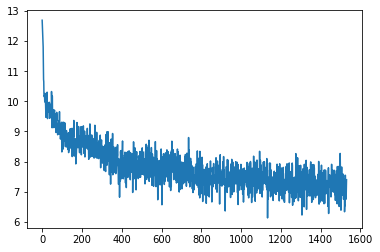

In [6]:
plt.plot(loss_lst)
plt.show()

In [7]:
# SAVE YOUR RESULT!!!!!
A = net.lsqnonneglst[0].A.data
B = net.linear.weight.data
A_np = A.numpy()
B_np = B.numpy()
np.save('supervised_A', A_np)
np.save('supervised_B', B_np)

In [8]:
# Get the whole output of the whole dataset (running forward propagation on the whole dataset)

In [9]:
def get_whole_output(net, dataset, param_lst = None):
    history = Writer()
    # initialize the network with certain initial value
    if param_lst is not None:
        for (i,param) in enumerate(net.parameters()):
            param.data = param_lst[i]
    # start to forward propagate, 100 at a time
    n = len(dataset)
    if n%100 == 0:
        batch_num = n/100
    else:
        batch_num = n//100 + 1
    print('batch_num = ', batch_num, '\n')
    for i in range(batch_num):
        print('current at batch:', i)
        try:
            (inputs, label) = dataset[i*100:(i+1)*100]
        except:
            (inputs, label) = dataset[i*100:]
        history.add_tensor('label', label)
        output, pred = net(inputs)
        history.add_tensor('output', output)
        history.add_tensor('pred', pred)
    return history

In [10]:
history = get_whole_output(net, dataset)

batch_num =  189 

current at batch: 0
current at batch: 1
current at batch: 2
current at batch: 3
current at batch: 4
current at batch: 5
current at batch: 6
current at batch: 7
current at batch: 8
current at batch: 9
current at batch: 10
current at batch: 11
current at batch: 12
current at batch: 13
current at batch: 14
current at batch: 15
current at batch: 16
current at batch: 17
current at batch: 18
current at batch: 19
current at batch: 20
current at batch: 21
current at batch: 22
current at batch: 23
current at batch: 24
current at batch: 25
current at batch: 26
current at batch: 27
current at batch: 28
current at batch: 29
current at batch: 30
current at batch: 31
current at batch: 32
current at batch: 33
current at batch: 34
current at batch: 35
current at batch: 36
current at batch: 37
current at batch: 38
current at batch: 39
current at batch: 40
current at batch: 41
current at batch: 42
current at batch: 43
current at batch: 44
current at batch: 45
current at batch: 46
curr

In [11]:
# merge all the result together
S_lst = history.get('output')

In [20]:
S_new_lst = [S_lst[i][0] for i in range(len(S_lst))]

In [22]:
S = torch.cat(S_new_lst, 0)

In [23]:
S.shape

torch.Size([18846, 20])

In [24]:
np.save('supervised_S', S)

In [31]:
pred_lst = history.get('pred')
pred = torch.cat(pred_lst, 0)
pred.shape

torch.Size([18846, 20])

In [36]:
label_lst = history.get('label')
label = torch.cat(label_lst,0)
label.shape

torch.Size([18846, 20])

In [39]:
torch.sum(torch.argmax(pred,1) == torch.argmax(label,1))

tensor(12717)

In [40]:
12717/18846

0.6747851002865329

In [41]:
 torch.argmax(label,1)

tensor([ 17,   7,  10,  ...,  10,  18,   9])